In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#Refresh Workspace

In [ ]:
import numpy as np, pandas as pd, seaborn as sb, matplotlib.pyplot as plt, \
math, time, copy, h5py, scipy, scipy.io, imageio, sklearn, sklearn.datasets, sklearn.linear_model
from tabulate import tabulate
from PIL import Image
from scipy import ndimage
from pylab import rcParams
rcParams['figure.figsize'] = 15,15
def nptb(x): print(tabulate(x,tablefmt="fancy_grid"))
np.random.seed(1)
#%load_ext google.colab.data_table               

#C1: Intro

###Warm up

####Broadcasting

In [ ]:
a = np.array([[56.0,0.0,4.4,68.0],
              [1.2,104.0,52.0,8.0],
              [1.8,135.0,99.0,0.9]])
nptb(a)

╒══════╤═════╤══════╤══════╕
│ 56   │   0 │  4.4 │ 68   │
├──────┼─────┼──────┼──────┤
│  1.2 │ 104 │ 52   │  8   │
├──────┼─────┼──────┼──────┤
│  1.8 │ 135 │ 99   │  0.9 │
╘══════╧═════╧══════╧══════╛


In [ ]:
percent = 100 * a / a.sum(axis=0)
nptb(percent)


╒══════════╤═════════╤═════════╤══════════╕
│ 94.9153  │  0      │  2.8314 │ 88.4265  │
├──────────┼─────────┼─────────┼──────────┤
│  2.0339  │ 43.5146 │ 33.462  │ 10.4031  │
├──────────┼─────────┼─────────┼──────────┤
│  3.05085 │ 56.4854 │ 63.7066 │  1.17035 │
╘══════════╧═════════╧═════════╧══════════╛


####Reshape array

In [ ]:
def image2vec(i): return i.reshape(i.shape[0] * i.shape[1] * i.shape[2], 1)

####Normalize rows

In [ ]:
def normalize_rows(x): return x / np.linalg.norm(x, axis=1, keepdims=True)

####Softmax

- $\text{for } x \in \mathbb{R}^{1\times n} \text{,     }$

\begin{align*}
 softmax(x) &= softmax\left(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}\right) \\&= \begin{bmatrix}
    \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} 
\end{align*}

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$  

\begin{align*}
softmax(x) &= softmax\begin{bmatrix}
            x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
            x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
            \vdots & \vdots & \vdots & \ddots & \vdots \\
            x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
            \end{bmatrix} \\ \\&= 
 \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} \\ \\ &= \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    \vdots  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} 
\end{align*}

In [ ]:
def softmax(x):
    e = np.exp(x)
    return e / np.sum(e, axis=1, keepdims=True)

####L1, L2 loss function

$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}$$

$$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}$$

In [ ]:
def L1(a,y): return sum(abs(a-y))
def L2(a,y): return np.dot(a-y,a-y)

##Load Data

In [ ]:
train_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/Andrew DL/train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:])
train_y = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/Andrew DL/test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:])
test_y = np.array(test_dataset["test_set_y"][:])

classes = np.array(test_dataset["list_classes"][:])

train_y = train_y.reshape((1, train_y.shape[0]))
test_y = test_y.reshape((1, test_y.shape[0]))

Example of a picture

y = [1]
A 'cat' picture.


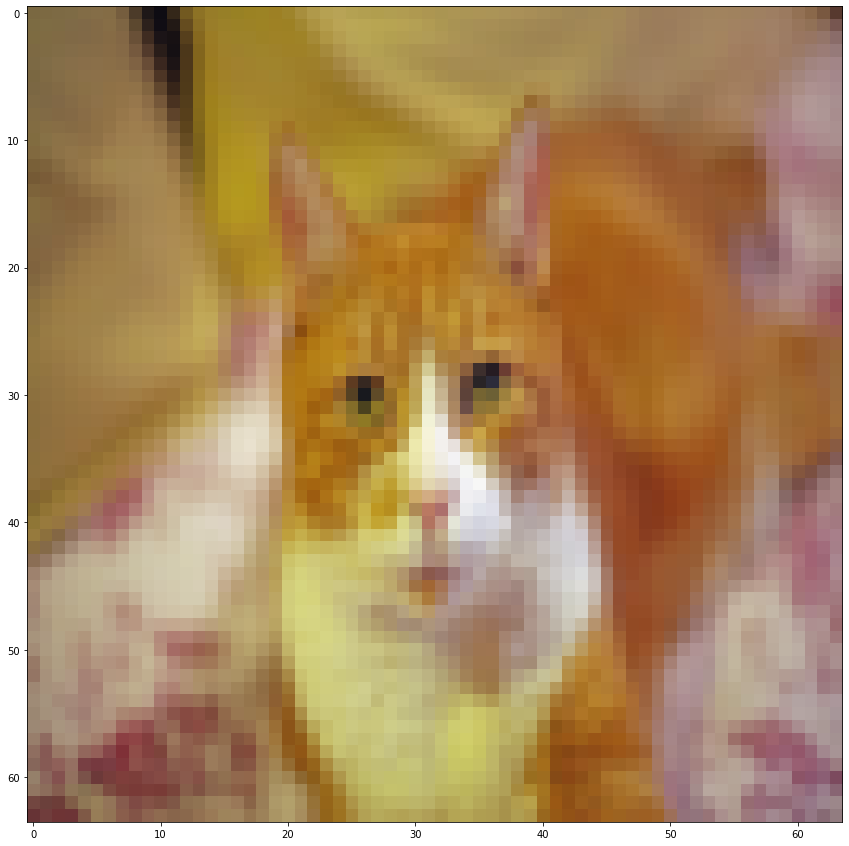

In [ ]:
index = 24
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[:, index]) + "\nA '" + classes[np.squeeze(train_y[:, index])].decode("utf-8") +  "' picture.")


In [ ]:
m_train = train_x_orig.shape[0]
m_test =  test_x_orig.shape[0]
num_px = train_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_x shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [ ]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.
print ("train_set_x_flatten shape: " + str(train_x.shape))
print ("test_set_x_flatten shape: " + str(test_x.shape))

train_set_x_flatten shape: (12288, 209)
test_set_x_flatten shape: (12288, 50)


##W2: NN Basics

In [ ]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

###Building algorithm

1. Define model structure (no. input features) 
2. Initialize parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Build 1-3 separately and integrate  into `model()`.


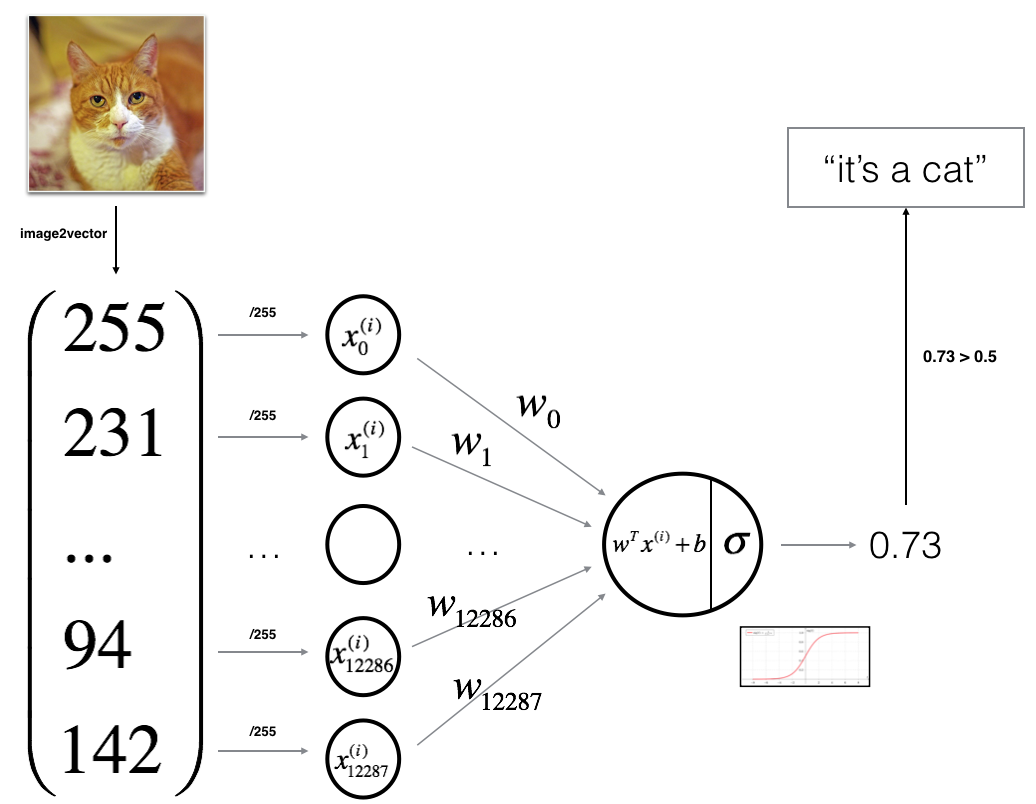

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:

- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

###Helper functions

####Initialize parameters

In [ ]:
def initialize_with_zeros(dim): return np.zeros((dim,1)), float(0)

####Forward & Backward Propagation

Forward Propagation:
$$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$$
$$J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$$
2 formulas:
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [ ]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(w.T @ X + b)
    cost = - np.sum(np.log(A) * Y + np.log(1 - A) * (1 - Y)) / m
    dw = X @ (A - Y).T / m
    db = np.sum(A - Y) / m
    cost = np.squeeze(cost)
    grads = {"dw": dw, "db": db}
    return grads, cost

Arguments:
- w - weights, array of size (num_px * num_px * 3, 1)
- b - bias, a scalar
- X - data of size (num_px * num_px * 3, no. examples)
- Y - true "label" vector (0 if non-cat, 1 if cat) of size (1, no. examples)

Variable:
- A - sigmoid(...) size (1, no. examples)

Return:
- cost - negative log-likelihood cost for logistic regression
- dw - gradient of the loss with respect to w, thus same shape as w
- db - gradient of the loss with respect to b, thus same shape as b

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w -= (learning_rate * dw)
        b -= (learning_rate * db)
        if i % 100 == 0:
            costs.append(cost)        
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs

Arguments:
- num_iterations - of the optimization loop
- learning_rate - of the gradient descent update rule
- print_cost - True to print the loss every 100 steps
    
Returns:
- params - dictionary containing the weights w and bias b
- grads - dictionary containing the gradients of the weights and bias with respect to the cost function
- costs - list of all the costs computed during the optimization, this will be used to plot the learning curve.
    

####Predict

In [ ]:
def predict(w, b, X):
    w = w.reshape(X.shape[0], 1)
    return sigmoid(w.T @ X + b) >= 0.5

Returns a vector containing all predictions (0/1) for the examples in X

###Model

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))    
    return {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

Returns dictionary containing information about the model.


In [ ]:
logistic_regression_model = model(train_x, train_y, test_x, test_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


####Testing

y = 1
Predicted: "cat


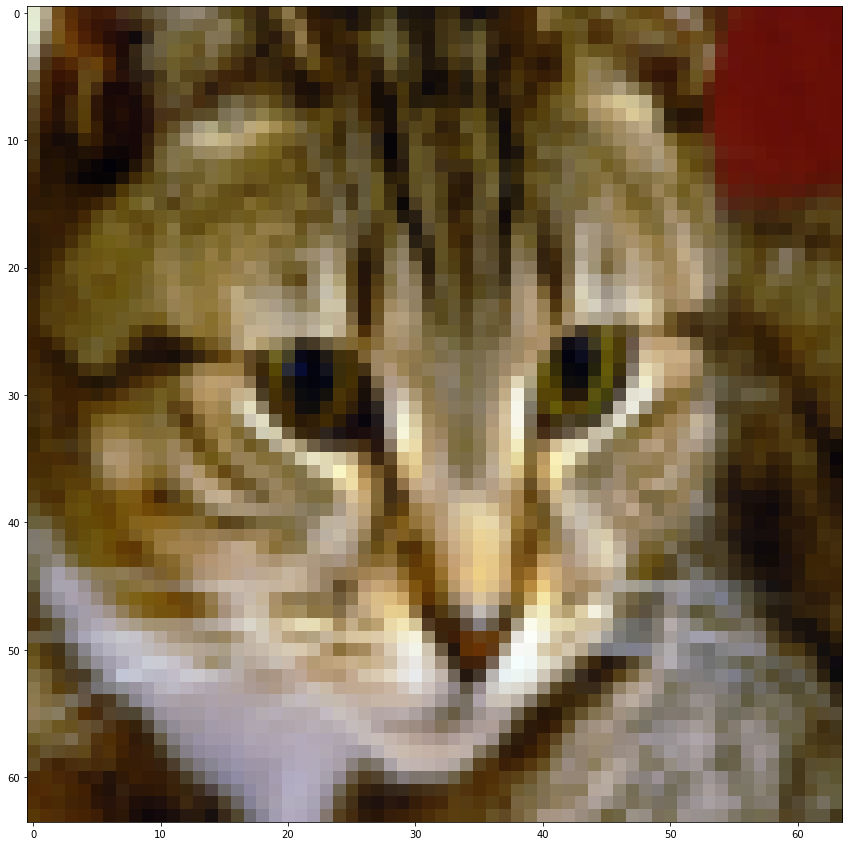

In [ ]:
# Example of a picture that was wrongly classified.
index = 15
plt.imshow(test_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_y[0,index]) + "\nPredicted: \"" +
       classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8"))

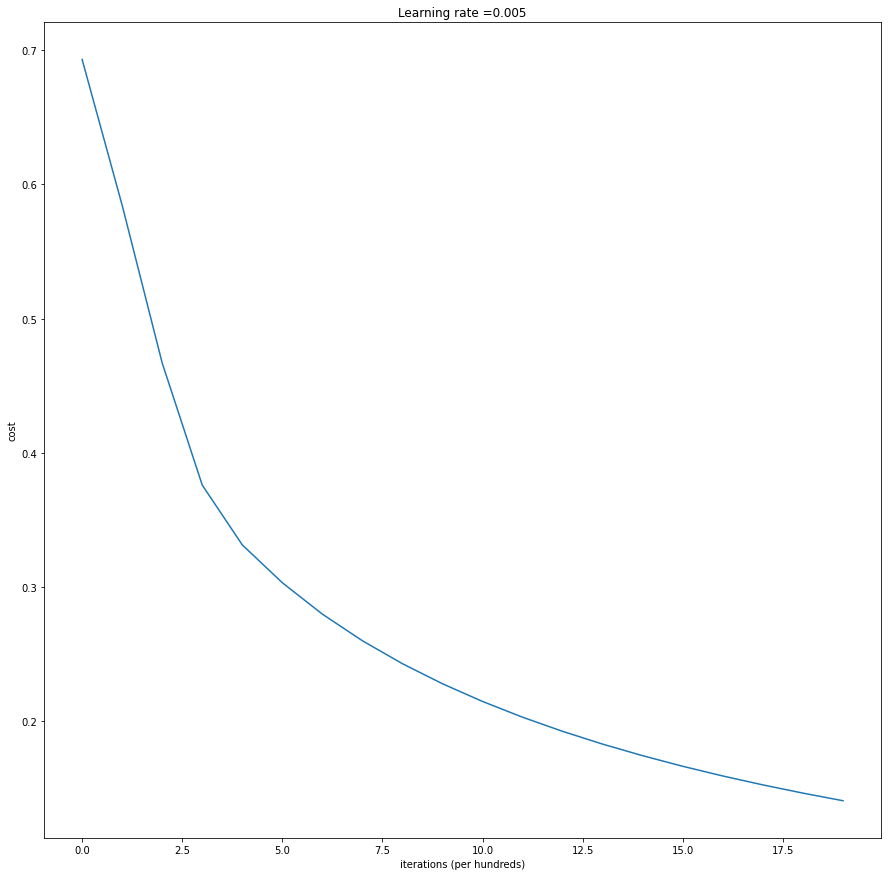

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

y = False
Predict: non-cat


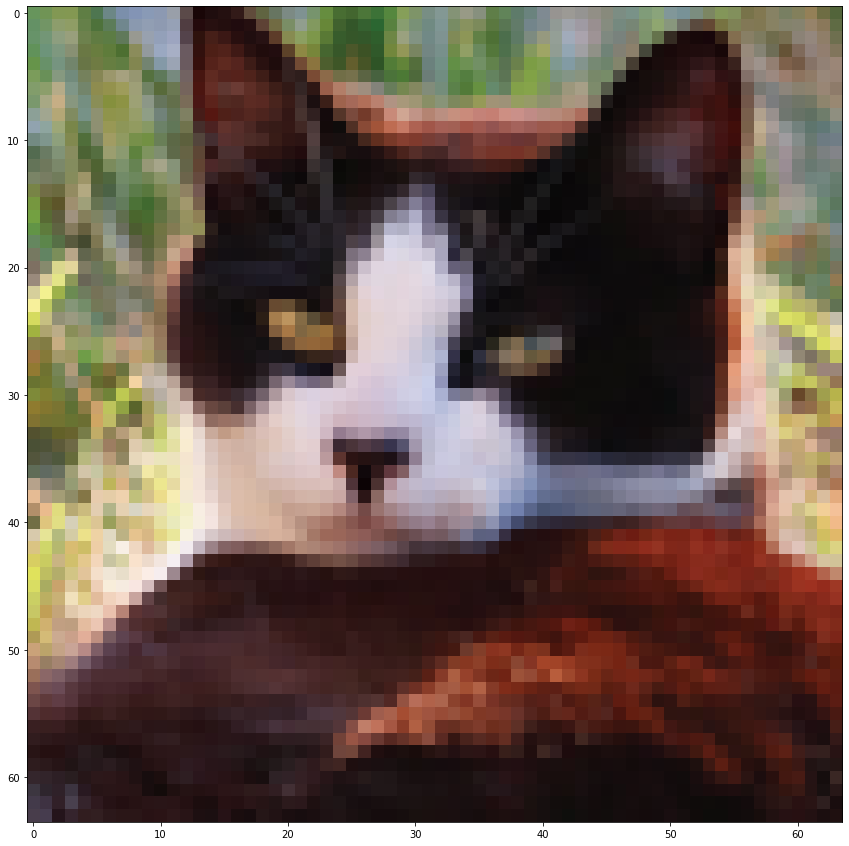

In [ ]:
image = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Andrew DL/cat.jpg").resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + "\nPredict: " +
      classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))

##W3: Shalow NN

General methodology to build a NN:
1. Define NN structure (# of input, hidden units,etc)
2. Initialize parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

Build helper functions to compute steps 1-3, then merge  into `nn_model()`

####Generate some data

In [ ]:
m = 400         # number of examples
N = int(m/2)    # number of points per class
X = np.zeros((m,2)) # data matrix where each row is a single example
Y = np.zeros((m,1), dtype='uint8') # labels vector (0 red, 1 blue)
a = 4           # maximum ray of the flower
for j in range(2):
    ix = range(N * j, N * (j + 1))
    t = np.linspace(j * 3.12, (j+1) * 3.12, N) + np.random.randn(N) * 0.2 # theta
    r = a * np.sin(4 * t) + np.random.randn(N) * 0.2 # radius
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    Y[ix] = j
X = X.T
Y = Y.T

In [ ]:
nptb(X)
nptb(Y)

╒═════════╤══════════╤════════════╤═══════════╤═════════╤══════════╤═════════╤════════════╤══════════╤══════════╤═════════╤═══════════╤══════════╤══════════╤═════════╤═══════════╤═════════╤═════════╤═════════╤═════════╤══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤══════════╤══════════╤═════════╤═════════╤═════════╤══════════╤══════════╤═════════╤══════════╤══════════╤══════════╤══════════╤═══════════╤══════════╤═════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╤════════════╤═══════════╤═══════════╤══════════╤══════════╤═══════════╤══════════╤═══════════╤══════════╤═══════════╤══════════╤═══════════╤══════════╤══════════╤═══════════╤══════════╤═══════════╤═══════════╤══════════╤═══════════╤═══════════╤════════════╤════════════╤

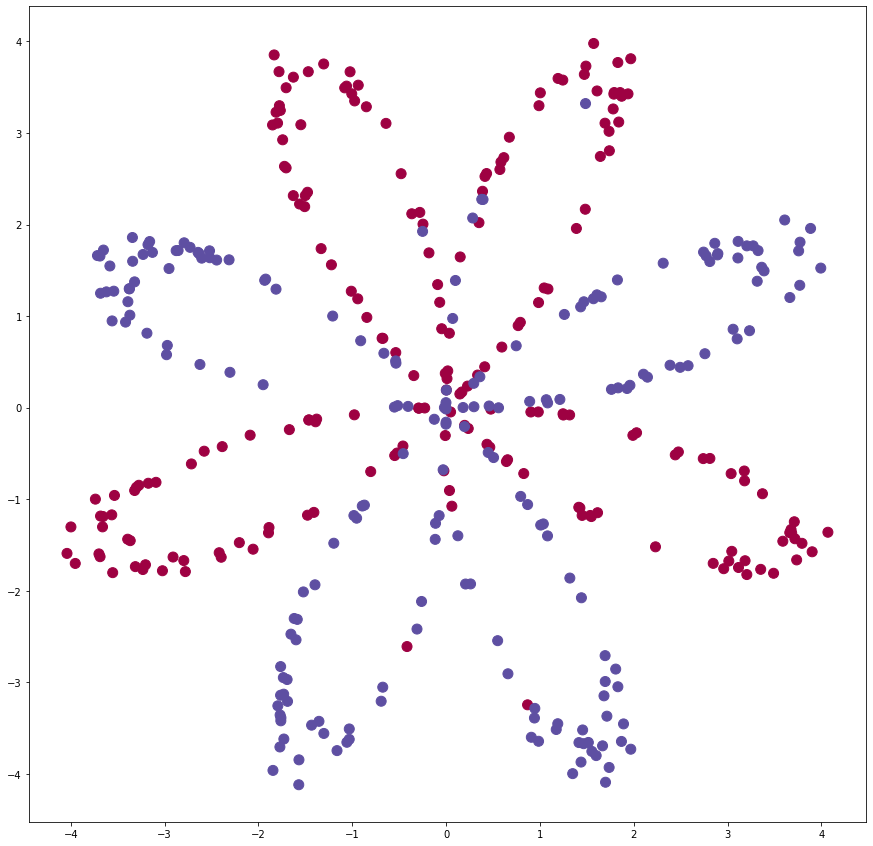

In [ ]:
plt.scatter(X[0,:], X[1,:], c=Y, s=100, cmap=plt.cm.Spectral);

####Simple Logistic Regression

In [ ]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Accuracy: 47 % of correctly labelled datapoints


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

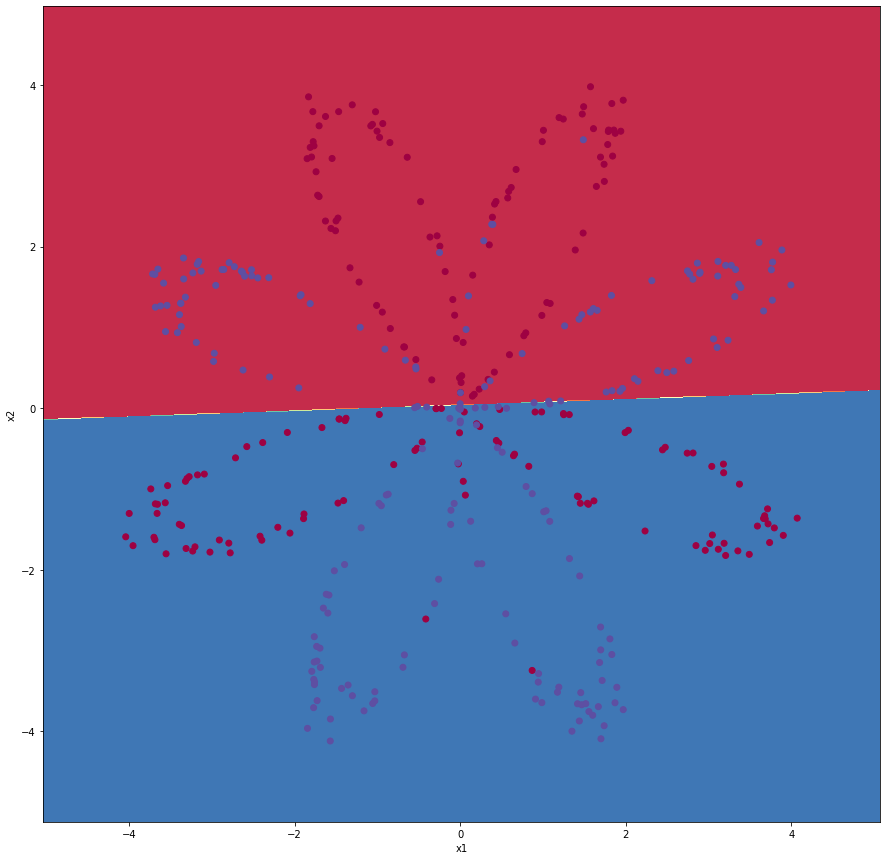

In [ ]:
LR_predictions = clf.predict(X.T)
print ('Accuracy: %d ' % 
       float((Y @ LR_predictions + (1 - Y) @ (1 - LR_predictions)) / float(Y.size) * 100) + 
       "% of correctly labelled datapoints")
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt

###Helper functions

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

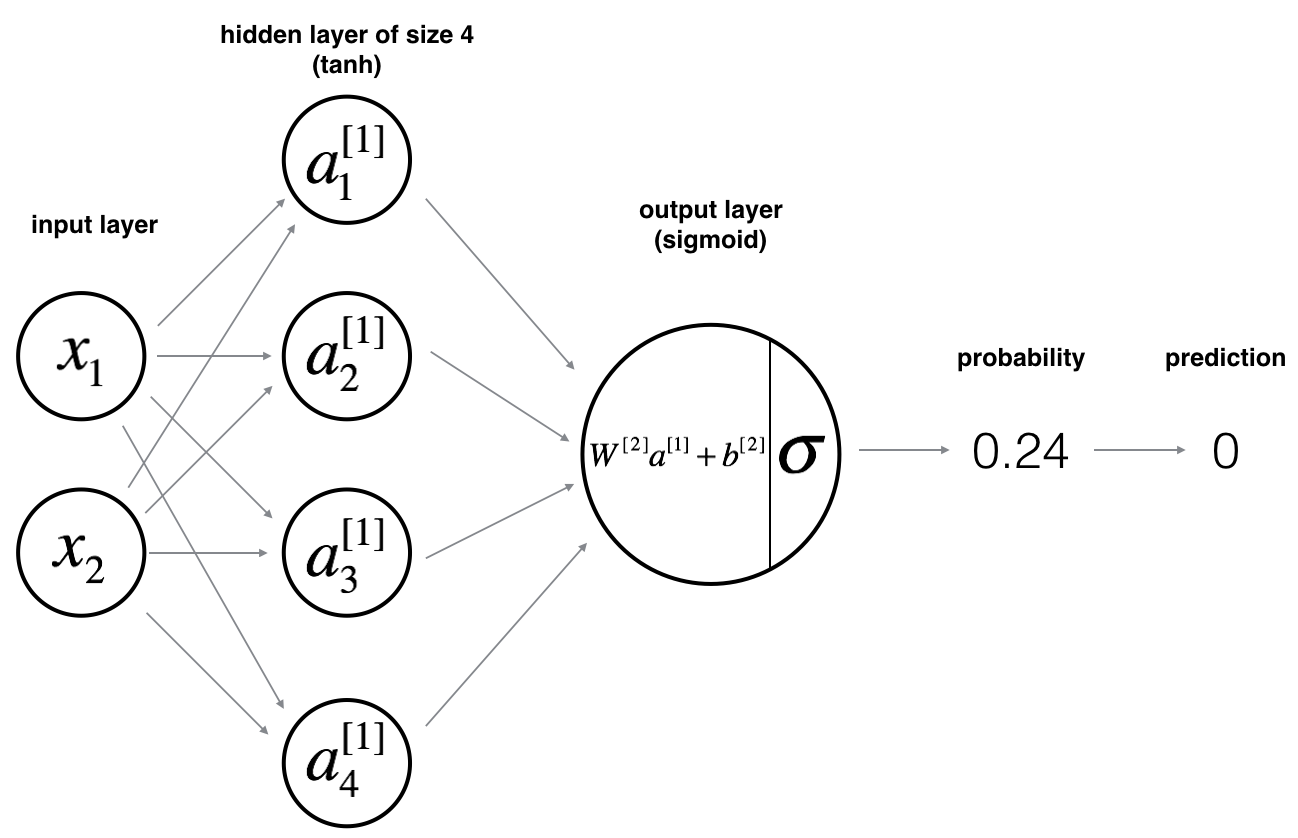

####Initialize

- X.shape = (2, m)
- Y.shape = (1, m)

In [ ]:
def layer_sizes(X, Y): return X.shape[0], 4, Y.shape[0]
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    return {"W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2 }

Argument: size of _ layer
- n_x - input = 2
- n_h - hidden = 4
- n_y - output = 1

Returns: params - dictionary containing your parameters:
- W1 - weight matrix (n_h, n_x) = (4, 2)
- b1 - bias vector (n_h, 1) = (4, 1)
- W2 - weight matrix (n_y, n_h) = (1, 4)
- b2 - bias vector (n_y, 1) = (1, 1)

####Forward propagation


$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$

In [ ]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = W1 @ X + b1
    A1 = np.tanh(Z1)
    Z2 = W2 @ A1 + b2
    A2 = sigmoid(Z2)
    assert(A2.shape == (1, X.shape[1]))
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2 }    
    return A2, cache

```
Z1   =   W1   @   X   +  b1
        (4,2) . (2,m) + (4,1)
(4,m)       (4,m)     + (4,m) (broadcast)

A1 = tanh(Z1) -> (4,m)

Z2   =    W2  @  A1   + b2
        (1,4) . (4,m) + (1,1)
(1,m)       (1,m)     + (1,m) (broadcast)

A2 = sigmoid(Z2) -> (1,m) match Y.shape
```

Returns:
- A2 - sigmoid output of 2nd activation
- cache - dictionary containing Z1, A1, Z2, A2

####Cost

$A^{[2]}$ computed, containing $a^{[2](i)}$ for all examples. Cost function:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$
Use `np.squeeze()` to remove redundant dimensions

In [ ]:
def compute_cost(A2, Y): return -float(np.squeeze((Y @ np.log(A2).T + (1-Y) @ np.log(1-A2).T) / Y.shape[1]))

    Y @ log(A2).T -> shape (1,1)

####Back propagation

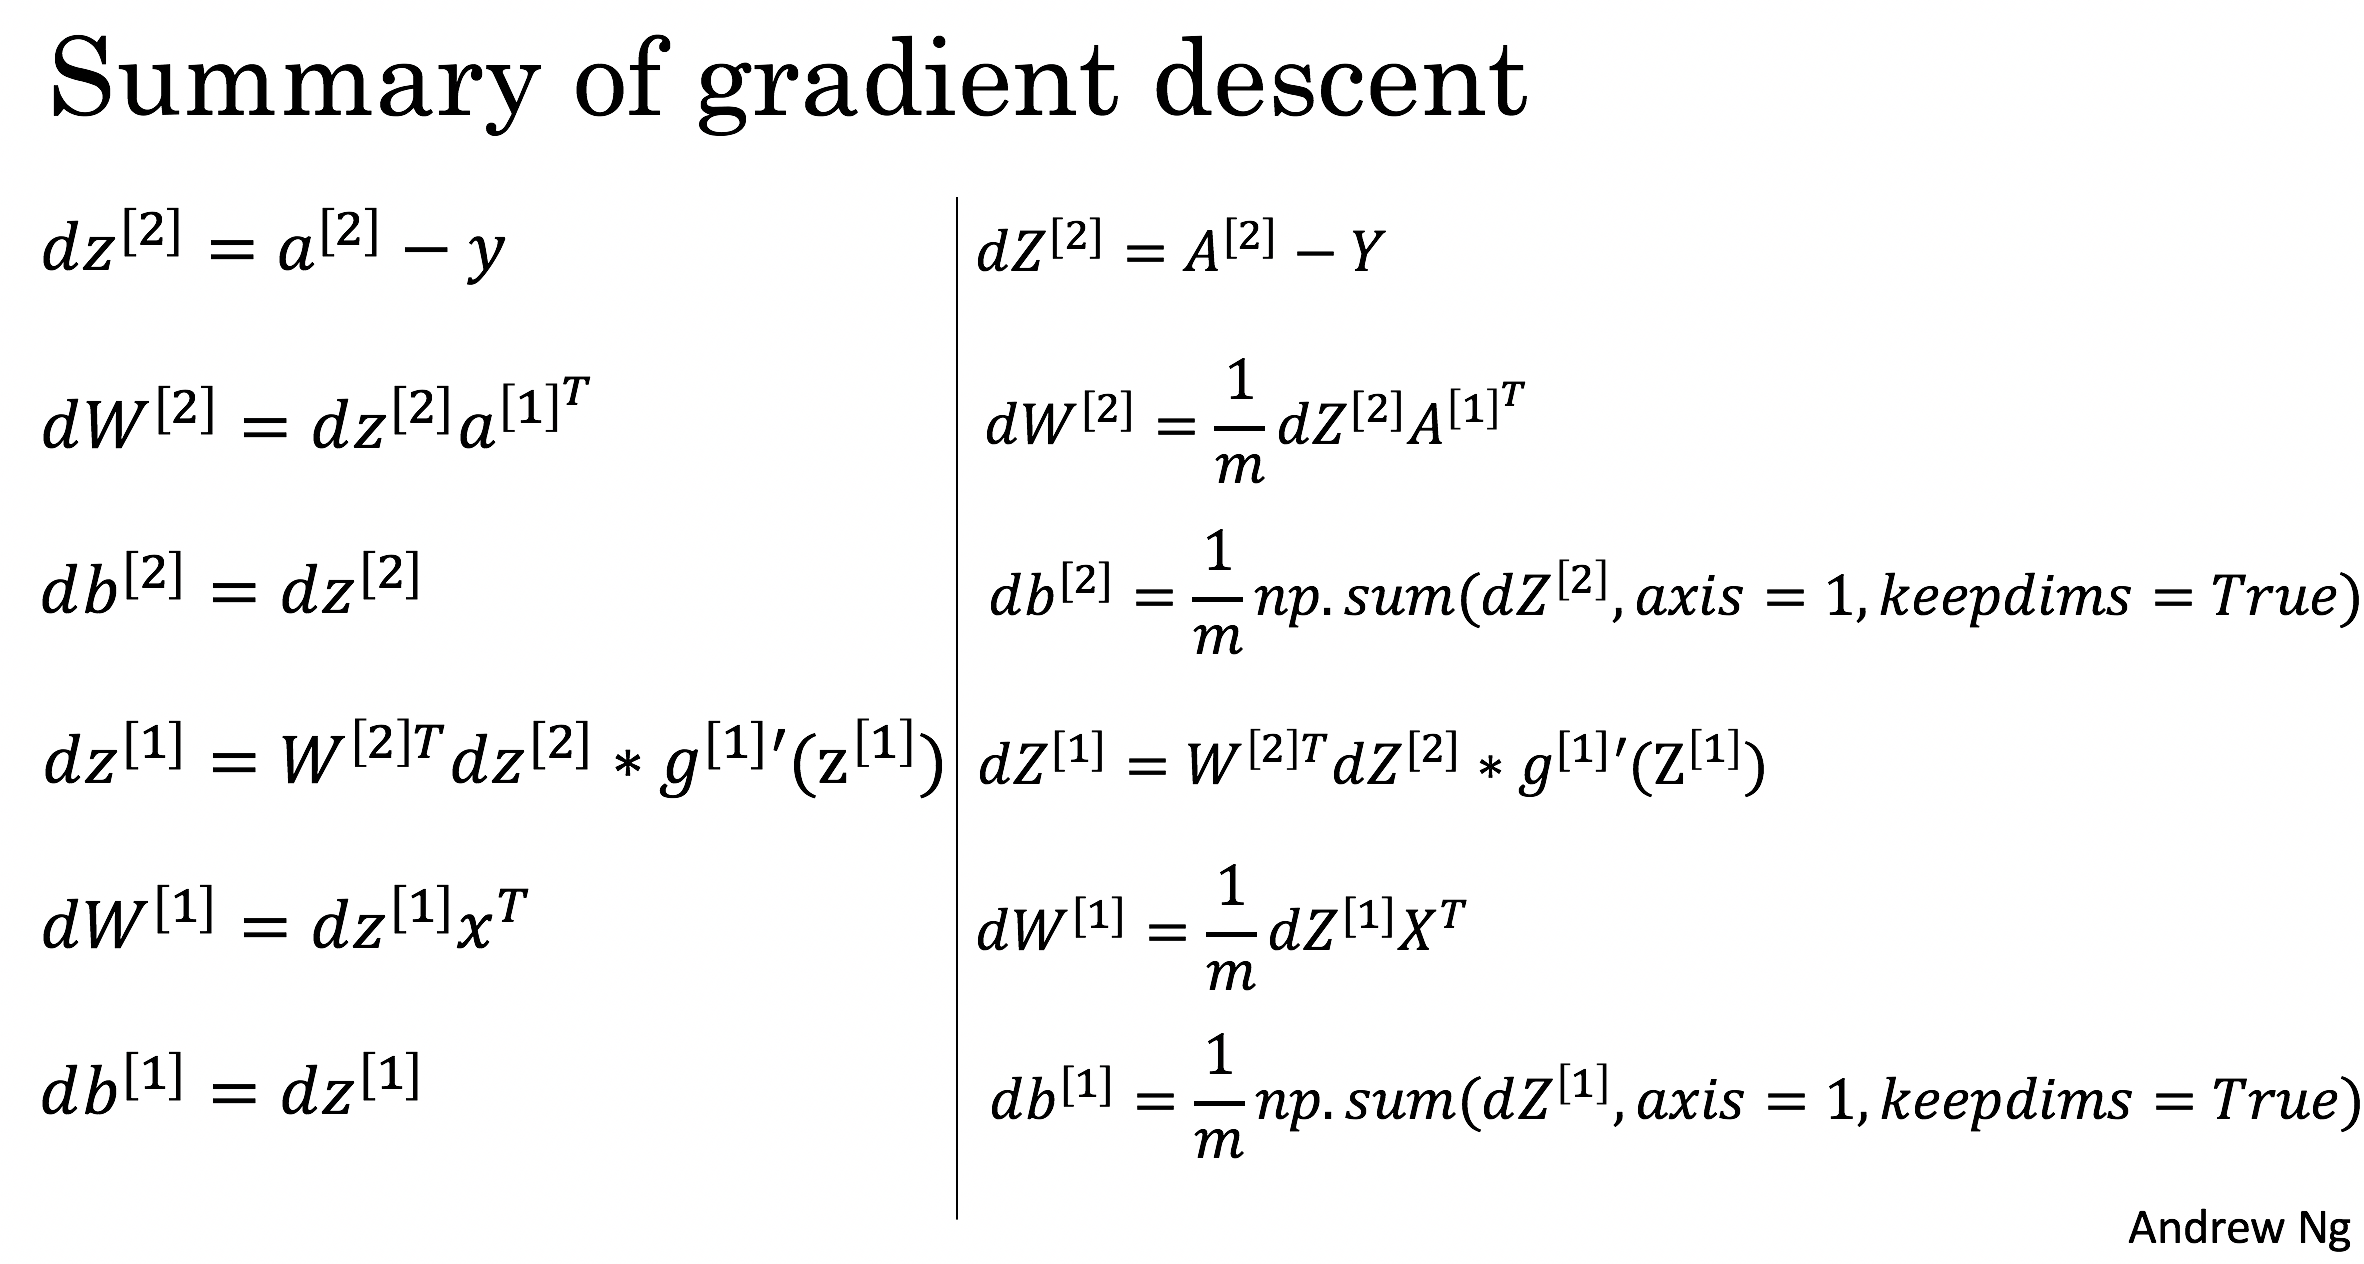

To compute dZ1 you'll need to compute 

$$g^{[1]'}(Z^{[1]})$$

$g^{[1]}()$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$

In [ ]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    dZ2 = A2 - Y
    dW2 = dZ2 @ A1.T / m
    db2 = np.sum(dZ2, axis=1,keepdims=True) / m
    dZ1 = W2.T @ dZ2 * (1 - A1**2)
    dW1 = dZ1 @ X.T / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return { "dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2 }

Returns: grads - dictionary containing gradients with respect to different parameters
    

####Gradient Descent

In [ ]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2    
    return {"W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2 }

Returns: parameters - dictionary containing updated parameters 

    

###NN Model

In [ ]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [ ]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    return (A2 > 0.5)

Returns: vector of predictions (red: 0 / blue: 1)

####Test

Cost after iteration 0: 0.693178
Cost after iteration 1000: 0.182943
Cost after iteration 2000: 0.175124
Cost after iteration 3000: 0.172383
Cost after iteration 4000: 0.170255
Cost after iteration 5000: 0.167210
Cost after iteration 6000: 0.163163
Cost after iteration 7000: 0.162501
Cost after iteration 8000: 0.162203
Cost after iteration 9000: 0.162002
Accuracy: 94%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

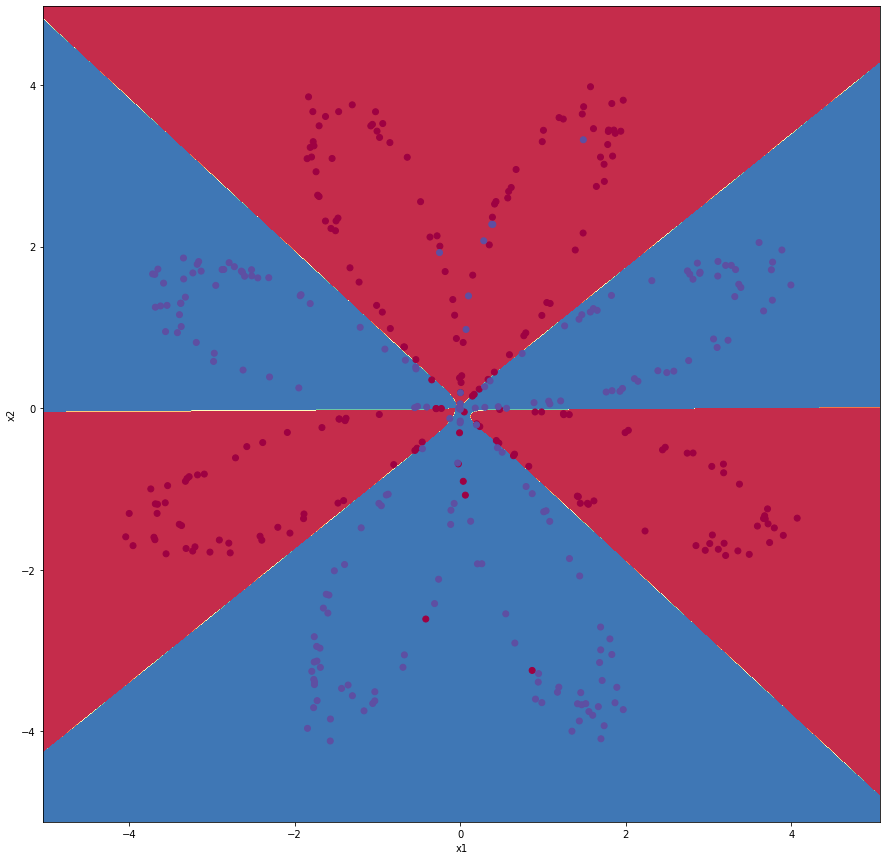

In [ ]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
predictions = predict(parameters, X)
print ('Accuracy: %d' % 
       float((Y @ predictions.T + (1 - Y) @ (1 - predictions.T)) / float(Y.size) * 100) + '%')
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt

##W4: Deep NN

###Necessary functions

Sigmoid & ReLU for W4

In [ ]:
def sigmoid(Z): return 1 / (1 + np.exp(-Z)), Z      # A, cache
def sigmoid_backward(dA, Z):
    s = 1 / (1 + np.exp(-Z))
    return dA * s * (1-s)       #dZ

def relu(Z): return np.maximum(0,Z), Z      # A, cache
def relu_backward(dA, Z):
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ


###Initialize

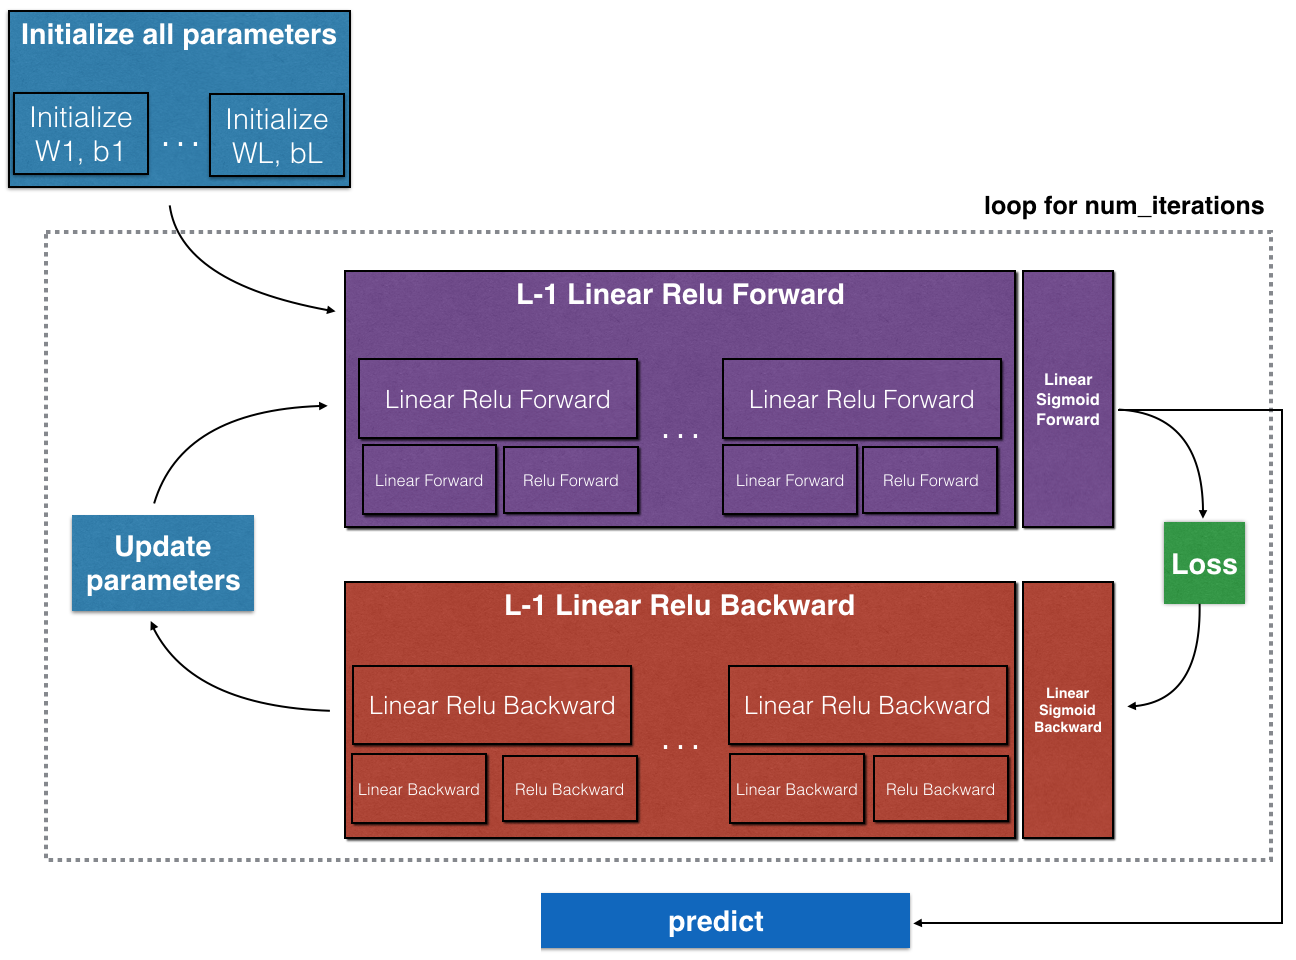

####2 layers

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    return {"W1": np.random.randn(n_h, n_x) * 0.01,
            "b1": np.zeros((n_h, 1)),
            "W2": np.random.randn(n_y, n_h) * 0.01,
            "b2": np.zeros((n_y, 1)) }

####L-layers

Model's structure is **[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID**

$L-1$ layers using ReLU followed by an output layer with sigmoid.

Store $n^{[l]}$ in `layer_dims`

```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

$n^{[l]}$ is the number of units in layer $l$. For example, size of input $X$ is $(12288, 209)$ (with $m=209$ examples)

<table style="width:100%">
    <tr>
        <td>  </td> 
        <td> <b>Shape of W</b> </td> 
        <td> <b>Shape of b</b>  </td> 
        <td> <b>Activation</b> </td>
        <td> <b>Shape of Activation</b> </td> 
    <tr>
    <tr>
        <td> <b>Layer 1</b> </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    <tr>
        <td> <b>Layer 2</b> </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>  
   <tr>
       <td> <b>Layer L-1</b> </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
   <tr>
   <tr>
       <td> <b>Layer L</b> </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>
</table>

When you compute $W X + b$, it carries out broadcasting 

$$ W = \begin{bmatrix}
    w_{00}  & w_{01} & w_{02} \\
    w_{10}  & w_{11} & w_{12} \\
    w_{20}  & w_{21} & w_{22} 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    x_{00}  & x_{01} & x_{02} \\
    x_{10}  & x_{11} & x_{12} \\
    x_{20}  & x_{21} & x_{22} 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    b_0  \\
    b_1  \\
    b_2
\end{bmatrix}\tag{2}$$

$$ WX + b = \begin{bmatrix}
    (w_{00}x_{00} + w_{01}x_{10} + w_{02}x_{20}) + b_0 & (w_{00}x_{01} + w_{01}x_{11} + w_{02}x_{21}) + b_0 & \cdots \\
    (w_{10}x_{00} + w_{11}x_{10} + w_{12}x_{20}) + b_1 & (w_{10}x_{01} + w_{11}x_{11} + w_{12}x_{21}) + b_1 & \cdots \\
    (w_{20}x_{00} + w_{21}x_{10} + w_{22}x_{20}) + b_2 &  (w_{20}x_{01} + w_{21}x_{11} + w_{22}x_{21}) + b_2 & \cdots
\end{bmatrix}\tag{3}  $$


In [ ]:
def initialize_parameters_deep(layer_dims):
    params = {}
    for l in range(1, len(layer_dims)):
        params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        params['b'+str(l)] = np.zeros((layer_dims[l],1))
    return params

###Forward Prop

####Linear Forward

$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$ where $A^{[0]} = X$

In [ ]:
def linear_forward(A, W, b): return W @ A + b, (A, W, b)

####Linear Activation Forward

- **Sigmoid**: 
$$\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$$
- **ReLU**: 
$$A = RELU(Z) = max(0, Z)$$

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
    Z, linear_cache = linear_forward(A_prev, W, b)
    if activation == "sigmoid": A, activation_cache = sigmoid(Z)
    elif activation == "relu": A, activation_cache = relu(Z)
    return A, (linear_cache, activation_cache)

####L - layer Forward

In [ ]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward\
        (A_prev, parameters['W'+str(l)], parameters['b'+str(l)],"relu")
        caches.append(cache)
    AL, cache = linear_activation_forward\
    (A, parameters['W'+str(L)], parameters['b'+str(L)],"sigmoid")
    caches.append(cache)
    return AL, caches

###Cost function

$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$

In [ ]:
def compute_cost(AL, Y): return - (Y @ np.log(AL).T + (1-Y) @ np.log(1-AL).T) / Y.shape[1]

###Back Prop

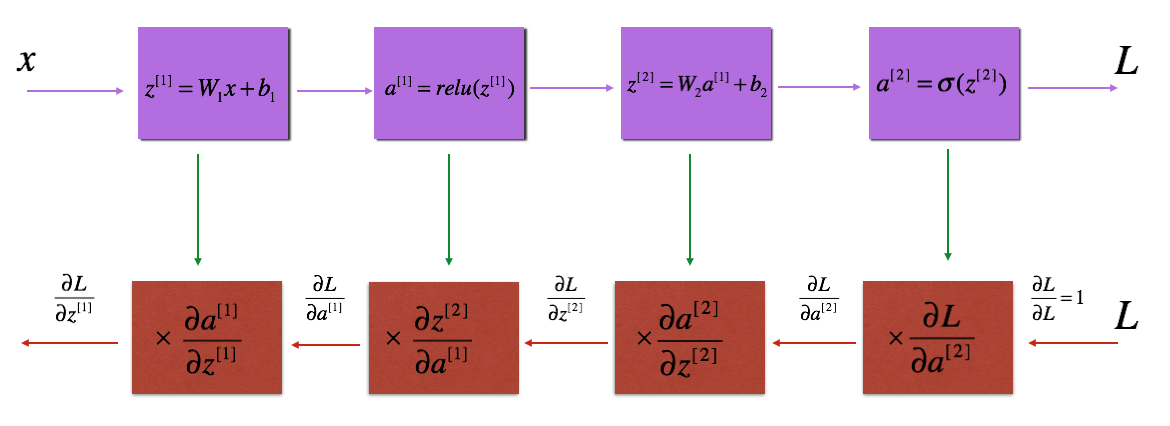

####Linear Backward

In [ ]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = dZ @ A_prev.T / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = W.T @ dZ
    return dA_prev, dW, db

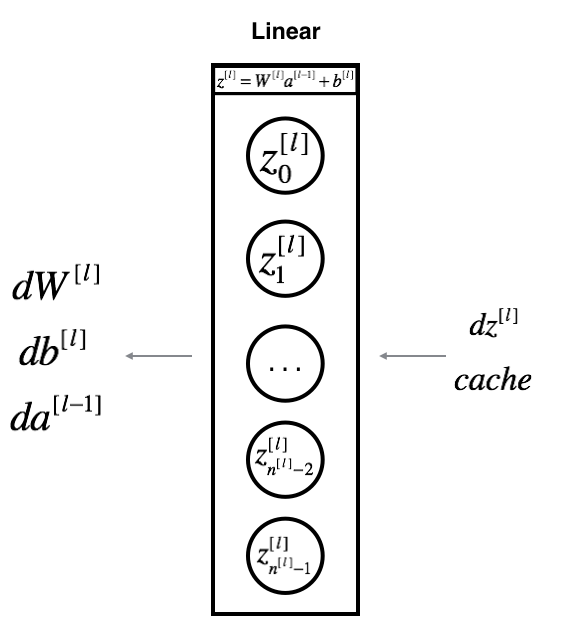

For layer $l$: 
$$Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$$

Suppose calculated the derivative 
$$dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$$
You want to get
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$

$A^{[l-1] T}$ is the transpose of $A^{[l-1]}$.

####Linear Activation Backward

 $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$

In [ ]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu": dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid": dZ = sigmoid_backward(dA, activation_cache)
    return linear_backward(dZ, linear_cache)

####L - layer Backward

Output:
$$A^{[L]} = \sigma(Z^{[L]})$$
You need to compute 
$$dA^{[L]} = \frac{\partial \mathcal{L}}{\partial A^{[L]}}$$
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
# derivative of cost with respect to AL
```
Arguments:
- AL - probability vector, output of forward prop (L_model_forward())
- Y - true "label" vector (0 if non-cat, 1 if cat)
- caches - list containing every cache of linear_activation_forward() with:
```
"relu" - caches[l], for l in range(L-1)
"sigmoid" - caches[L-1]
```

In [ ]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = (1-Y) / (1-AL) - Y / AL
    current_cache = caches[L-1]
    grads['dA'+str(L-1)], grads['dW'+str(L)], grads['db'+str(L)] = \
    linear_activation_backward(dAL, current_cache, "sigmoid")
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward\
        (grads['dA'+str(l+1)], current_cache, "relu")
        grads["dA"+str(l)] = dA_prev_temp
        grads["dW"+str(l+1)] = dW_temp
        grads["db"+str(l+1)] = db_temp
    return grads

####Update Parameters

$ W^{[l]} -= \alpha dW^{[l]}$

$ b^{[l]} -= \alpha db^{[l]}$

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    params = parameters.copy()
    for l in range(len(params) // 2):
        params["W"+str(l+1)] = params["W"+str(l+1)] - learning_rate * grads['dW'+str(l+1)]
        params["b"+str(l+1)] = params["b"+str(l+1)] - learning_rate * grads['db'+str(l+1)]
    return params

###Predict

In [ ]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1,m))
    probas, caches = L_model_forward(X, parameters)
    for i in range(0, probas.shape[1]): p[0,i] = (probas[0,i] > 0.5)
    print("Accuracy: " + str(np.sum((p == y)/m)))
    return p

###Model

In [ ]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    grads = {}
    costs = []
    n_x, n_h, n_y = layers_dims
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        cost = compute_cost(A2, Y)
        dA2 = (1 - Y) / (1 - A2) - Y / A2
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        parameters = update_parameters(parameters, grads, learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    return parameters, costs

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(num_iterations):
        AL, caches = L_model_forward(X,parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    return parameters, costs

In [ ]:
def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

###Testing

####2-layer NN

In [ ]:
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

Cost after iteration 0: 0.6930497356599891
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.4007977536203885
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366414
Cost after iteration 1100: 0.30527536361962654
Cost after iteration 1200: 0.27491377282130147
Cost after iteration 1300: 0.2468176821061485
Cost after iteration 1400: 0.19850735037466108
Cost after iteration 1500: 0.1744831811255663
Cost after iteration 1600: 0.1708076297809589
Cost after iteration 1700: 0.11306524562164748
Cost after iteration 1800: 0.09629426845937165
Cost after iteration 1900: 0.08342617959726872
Cost after iteration 2000: 0.0743907870431909
Cost after iteration 2100: 0.066307481322

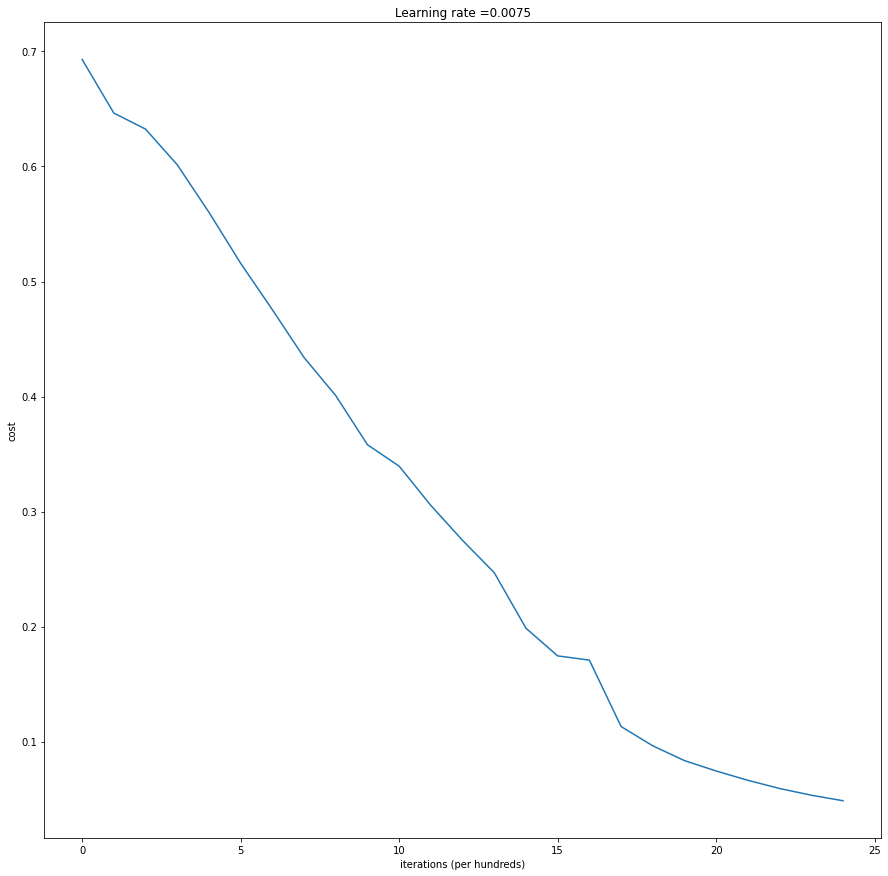

In [ ]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
plot_costs(costs, learning_rate)

In [ ]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [ ]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


####L-layer NN

In [ ]:
layers_dims = [12288, 20, 7, 5, 1]

In [ ]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.6657143645782259
Cost after iteration 100: 0.4759861655196833
Cost after iteration 200: 0.4147630829750495
Cost after iteration 300: 0.38653355505924514
Cost after iteration 400: 0.28545658278517533
Cost after iteration 500: 0.25141932673753664
Cost after iteration 600: 0.24133615044780107
Cost after iteration 700: 0.20606928942044336
Cost after iteration 800: 0.1855796598735445
Cost after iteration 900: 0.1687576473273027
Cost after iteration 1000: 0.15323491336123538
Cost after iteration 1100: 0.13586526495100493
Cost after iteration 1200: 0.10868929622233003
Cost after iteration 1300: 0.0941827631998273
Cost after iteration 1400: 0.07507415837154617
Cost after iteration 1500: 0.05605988996494476
Cost after iteration 1600: 0.1301717036839887
Cost after iteration 1700: 0.03932495713625873
Cost after iteration 1800: 0.02479306404982457
Cost after iteration 1900: 0.017053267350987923
Cost after iteration 2000: 0.012835128649419898
Cost after iteration 2100: 0.0

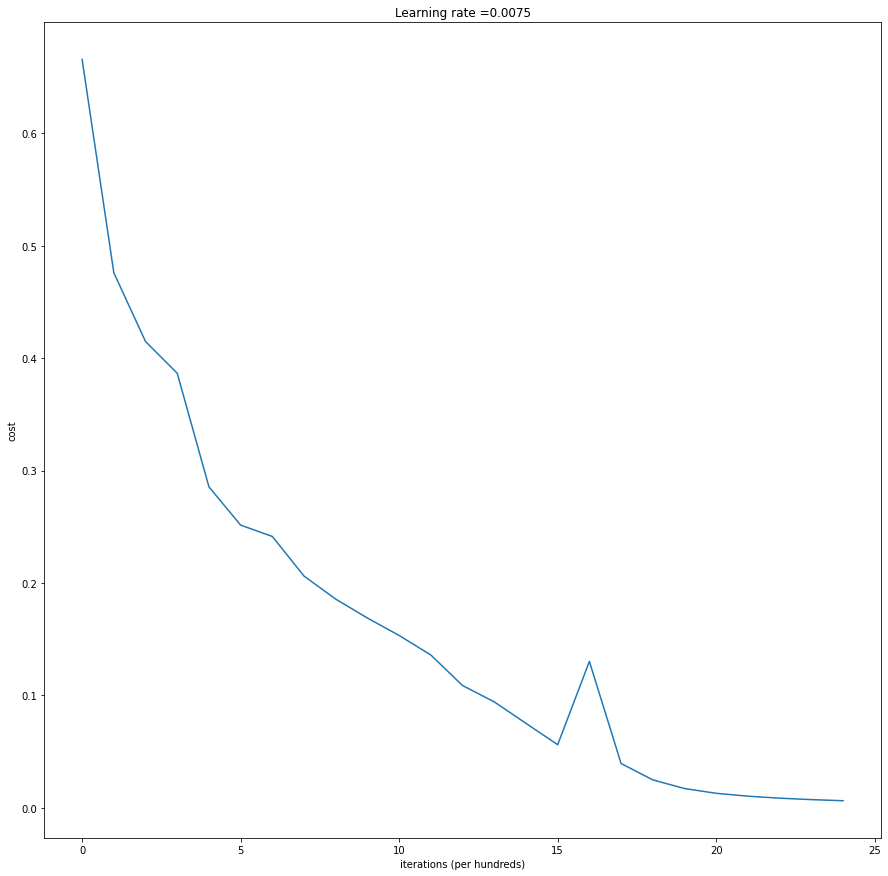

In [ ]:
plot_costs(costs)

In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.68


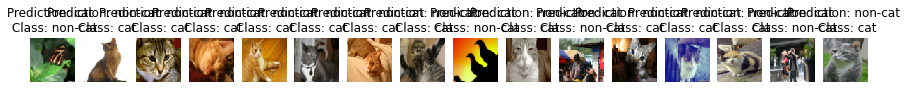

In [ ]:
def print_mislabeled_images(classes, X, y, p):
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + \
                  " \n Class: " + classes[y[0,index]].decode("utf-8"))
print_mislabeled_images(classes, test_x, test_y, pred_test)

#C2: Hyperparameter Tuning, Regularization & Optimization

###Utilities

In [ ]:
def sigmoid(x): return 1/(1+np.exp(-x))
def relu(x): return np.maximum(0,x)

def load_params_and_grads(seed=1):
    np.random.seed(seed)
    W1 = np.random.randn(2,3)
    b1 = np.random.randn(2,1)
    W2 = np.random.randn(3,3)
    b2 = np.random.randn(3,1)

    dW1 = np.random.randn(2,3)
    db1 = np.random.randn(2,1)
    dW2 = np.random.randn(3,3)
    db2 = np.random.randn(3,1)
    
    return W1, b1, W2, b2, dW1, db1, dW2, db2

def initialize_parameters(layer_dims):
    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))       
    return parameters

def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    z1 = W1 @ X + b1
    a1 = relu(z1)
    z2 = W2 @ a1 + b2
    a2 = relu(z2)
    z3 = W3 @ a2 + b3
    a3 = sigmoid(z3)
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)    
    return a3, cache

def backward_propagation(X, Y, cache):
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = (a3 - Y) / X.shape[1]
    dW3 = dz3 @ a2.T
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = W3.T @ dz3
    dz2 = da2 * np.int64(a2 > 0)
    dW2 = dz2 @ a1.T
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = W2.T @ dz2
    dz1 = da1 * np.int64(a1 > 0)
    dW1 = dz1 @ X.T
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    return gradients

def update_parameters(parameters, grads, learning_rate):
    for k in range(len(parameters) // 2):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
    return parameters

def compute_cost(a3, Y):
    return np.nansum(np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)) / Y.shape[1]

def predict(X, y, parameters):
    p = np.zeros((1, X.shape[1]), dtype = np.int)
    a3, caches = forward_propagation(X, parameters)
    for i in range(0, a3.shape[1]): p[0,i] = (a3[0,i] > 0.5)
    print("Accuracy:",np.mean((p[0,:] == y[0,:])))
    return p

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()
    
def predict_dec(parameters, X):
    a3, cache = forward_propagation(X, parameters)
    return (a3>0.5)

def dictionary_to_vector(parameters):
    keys = []
    count = 0
    for key in ['W1','b1','W2','b2','W3','b3']:
        new_vector = np.reshape(parameters[key], (-1,1))
        keys = keys + [key] * new_vector.shape[0]
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count += 1
    return theta, keys

def vector_to_dictionary(theta):
    parameters = {}
    parameters["W1"] = theta[:20].reshape((5,4))
    parameters["b1"] = theta[20:25].reshape((5,1))
    parameters["W2"] = theta[25:40].reshape((3,5))
    parameters["b2"] = theta[40:43].reshape((3,1))
    parameters["W3"] = theta[43:46].reshape((1,3))
    parameters["b3"] = theta[46:47].reshape((1,1))
    return parameters

def gradients_to_vector(gradients):
    count = 0
    for key in ['dW1','db1','dW2','db2','dW3','db3']:
        new_vector = np.reshape(gradients[key], (-1,1))
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count += 1
    return theta

###Load data

In [ ]:
def load_cat_dataset():
    train_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/Andrew DL/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File('/content/drive/MyDrive/Colab Notebooks/Andrew DL/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:])    
    train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))    
    train_set_x_orig = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
    test_set_x_orig = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T    
    train_set_x = train_set_x_orig/255
    test_set_x = test_set_x_orig/255
    return train_set_x, train_set_y, test_set_x, test_set_y, classes

def load_2circle_dataset():
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

def load_moons_dataset():
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    return train_X, train_Y

def load_planar_dataset(seed):    
    np.random.seed(seed)    
    m = 400             # no. examples
    N = int(m/2)        # no. points per class
    D = 2               # dimension
    X = np.zeros((m,D)) # data matrix - each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 red, 1 blue)
    a = 4               # maximum ray of the flower
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    return X.T, Y.T

def load_planar_dataset(randomness, seed):    
    np.random.seed(seed)    
    m = 50
    N = int(m/2)
    D = 2
    X = np.zeros((m,D))
    Y = np.zeros((m,1), dtype='uint8') 
    a = 2 
    for j in range(2):        
        ix = range(N*j,N*(j+1))
        if j == 0:
            t = np.linspace(j, 4*3.1415*(j+1),N)
            r = 0.3*np.square(t) + np.random.randn(N)*randomness # radius
        if j == 1:
            t = np.linspace(j, 2*3.1415*(j+1),N)
            r = 0.2*np.square(t) + np.random.randn(N)*randomness # radius            
        X[ix] = np.c_[r*np.cos(t), r*np.sin(t)]
        Y[ix] = j
    return X.T, Y.T

def load_2D_dataset():
    data = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/Andrew DL/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T
    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);    
    return train_X, train_Y, test_X, test_Y

##W1: Initialization, Regularization, Gradient Checking

###Initialization

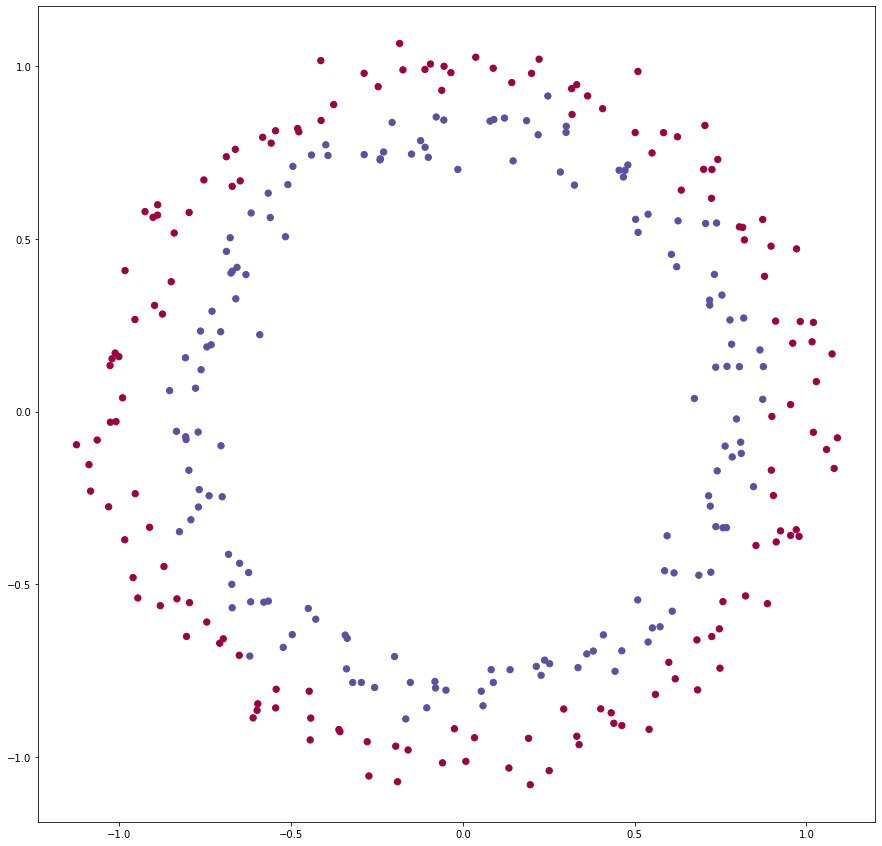

In [ ]:
train_X, train_Y, test_X, test_Y = load_2circle_dataset()

####Model

In [ ]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    for i in range(0, num_iterations):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_cost(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters

####Zero

In [ ]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    for l in range(1, len(layers_dims)):
        parameters['W'+str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599453
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


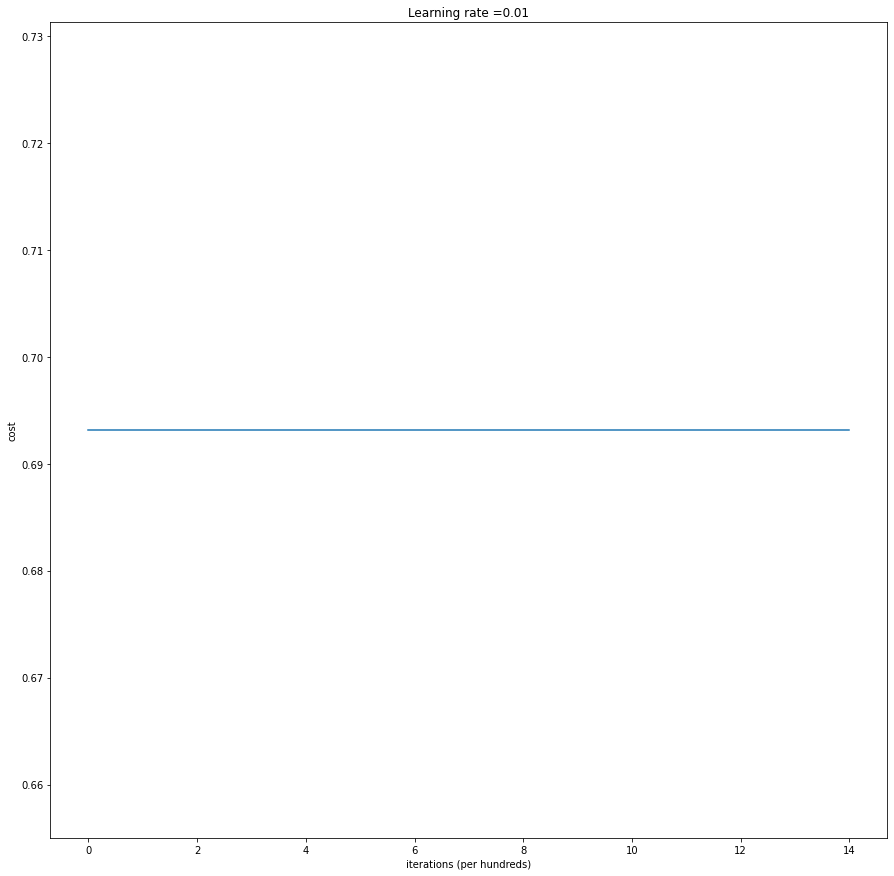

Train set:
Accuracy: 0.5
Test set:
Accuracy: 0.5


In [ ]:
parameters = model(train_X, train_Y, initialization='zeros')
print('Train set:')
predictions_train = predict(train_X, train_Y, parameters)
print('Test set:')
predictions_test = predict(test_X, test_Y, parameters)

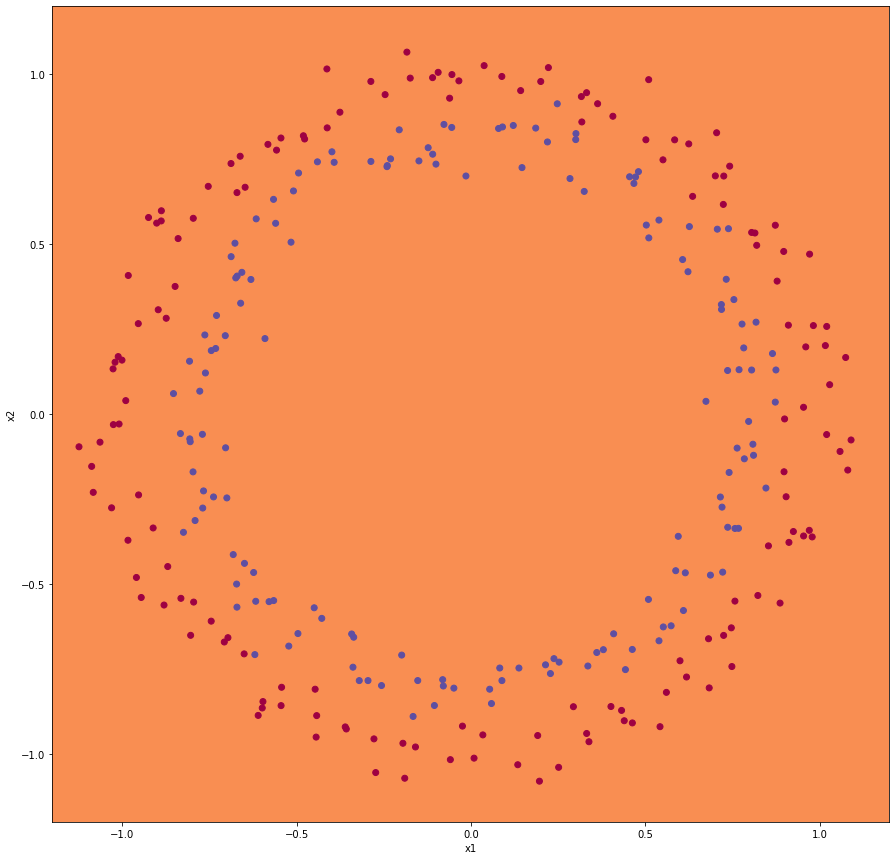

In [ ]:
axes = plt.gca()
axes.set_xlim([-1.2,1.2])
axes.set_ylim([-1.2,1.2])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

####Random

In [ ]:
def initialize_parameters_random(layers_dims):
    parameters = {}
    for l in range(1, len(layers_dims)):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 0: inf
Cost after iteration 1000: 0.6106122112025312
Cost after iteration 2000: 0.49914472439682783
Cost after iteration 3000: 0.38237862090022967
Cost after iteration 4000: 0.36674370827102915
Cost after iteration 5000: 0.36269819845923557
Cost after iteration 6000: 0.35964382542928114
Cost after iteration 7000: 0.356869021088087
Cost after iteration 8000: 0.35371002139178864
Cost after iteration 9000: 0.3503571289394337
Cost after iteration 10000: 0.3476176469181854
Cost after iteration 11000: 0.3450853350084365
Cost after iteration 12000: 0.343019108123904
Cost after iteration 13000: 0.34093183032538016
Cost after iteration 14000: 0.3386033675814431


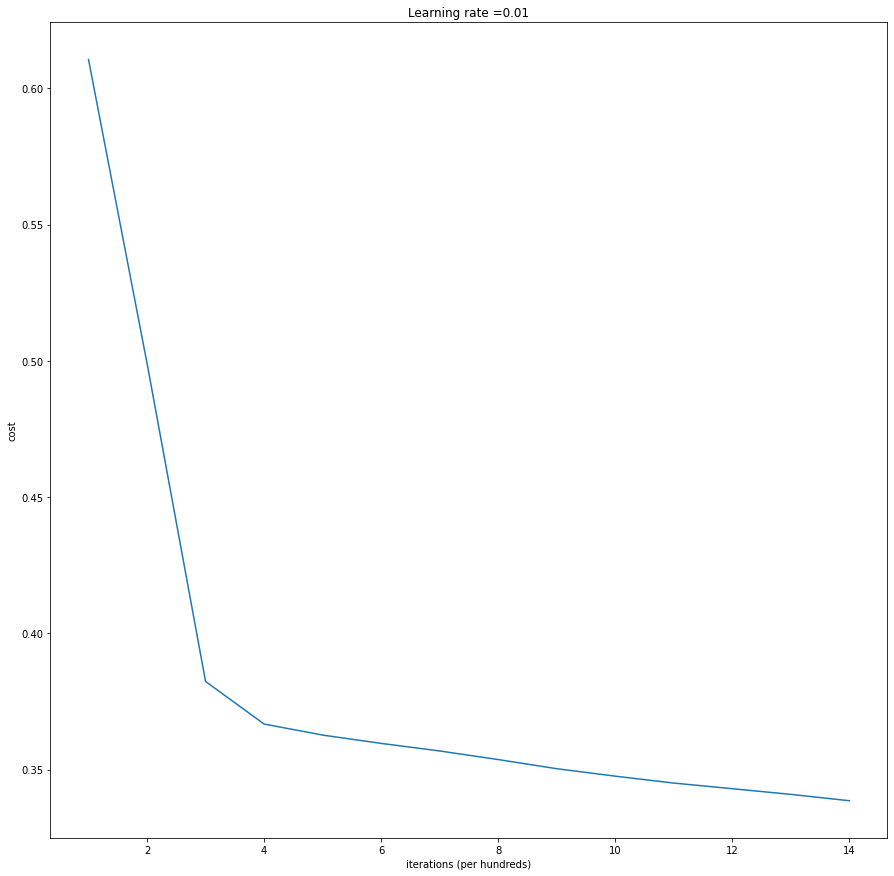

Train set:
Accuracy: 0.8166666666666667
Test set:
Accuracy: 0.81


In [ ]:
parameters = model(train_X, train_Y, initialization="random")
print('Train set:')
predictions_train = predict(train_X, train_Y, parameters)
print('Test set:')
predictions_test = predict(test_X, test_Y, parameters)

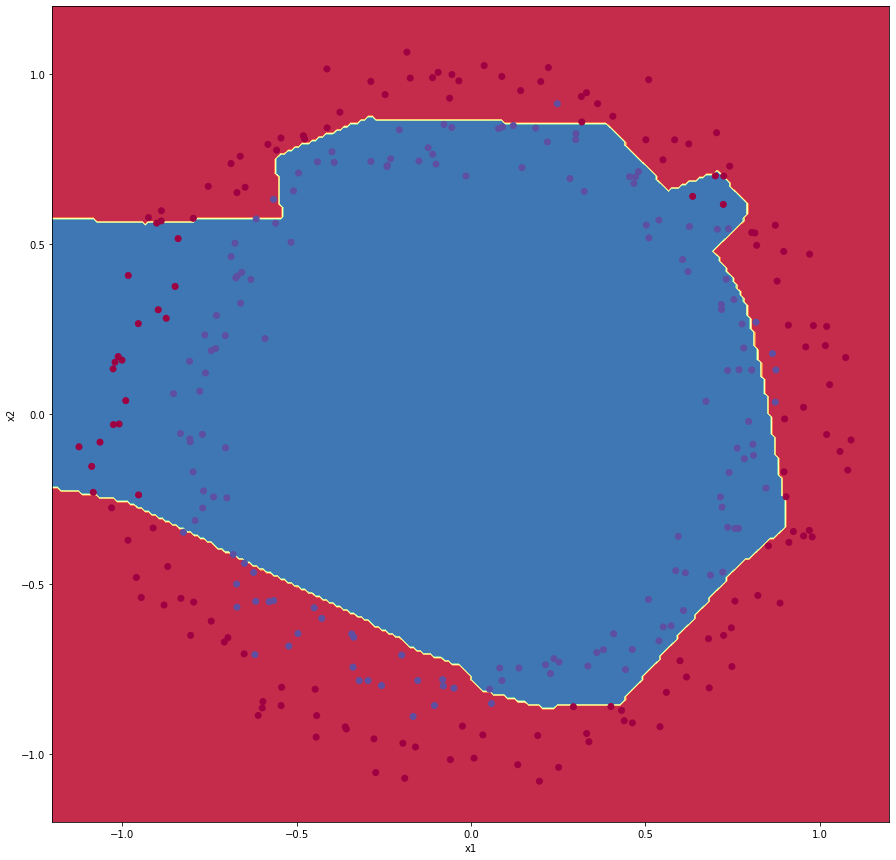

In [ ]:
axes = plt.gca()
axes.set_xlim([-1.2,1.2])
axes.set_ylim([-1.2,1.2])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

####He

Scaling factor for weights $W^{[l]}$
- Xavier -- `sqrt(1./layers_dims[l-1])`
- He -- `sqrt(2./layers_dims[l-1])`

In [ ]:
def initialize_parameters_he(layers_dims):
    parameters = {}
    for l in range(1, len(layers_dims)):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

Cost after iteration 0: 0.7025760517030526
Cost after iteration 1000: 0.6647959033740519
Cost after iteration 2000: 0.6342371871220287
Cost after iteration 3000: 0.5804855946470534
Cost after iteration 4000: 0.4916700549298225
Cost after iteration 5000: 0.37408592815907943
Cost after iteration 6000: 0.2669162304653949
Cost after iteration 7000: 0.19214514801061108
Cost after iteration 8000: 0.14427773376793798
Cost after iteration 9000: 0.11387595842585113
Cost after iteration 10000: 0.09322595867066497
Cost after iteration 11000: 0.07928836092618355
Cost after iteration 12000: 0.06915394454681892
Cost after iteration 13000: 0.061590886189855996
Cost after iteration 14000: 0.05517834042757464


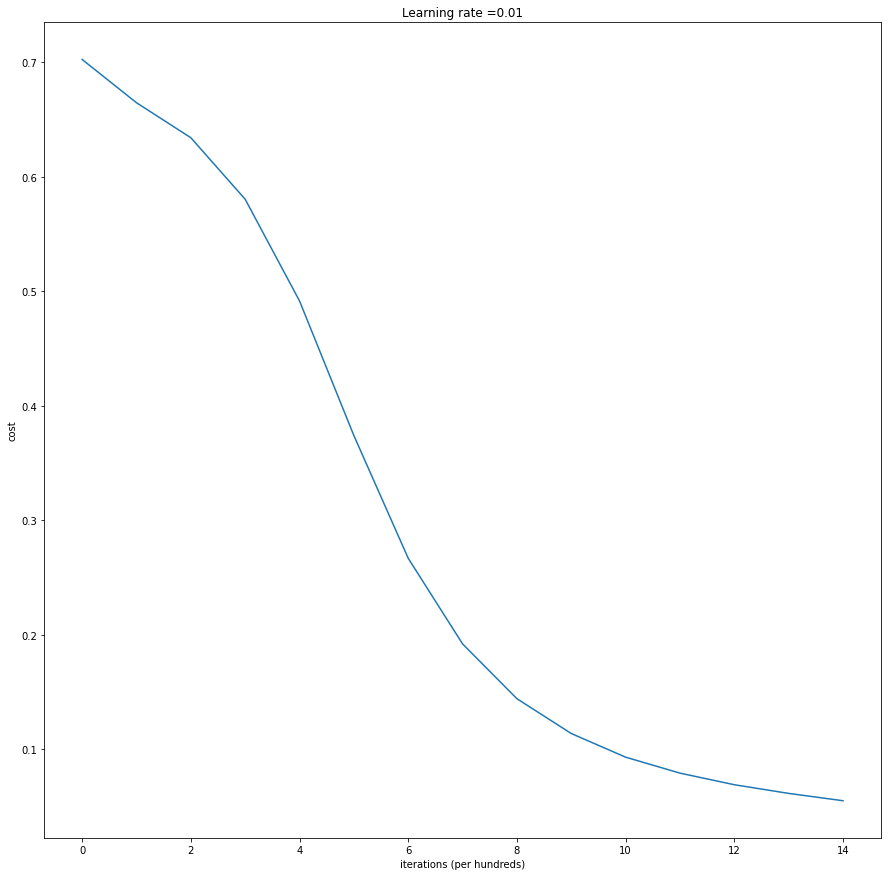

Train set:
Accuracy: 0.9933333333333333
Test set:
Accuracy: 0.99


In [ ]:
parameters = model(train_X, train_Y, initialization="he")
print('Train set:')
predictions_train = predict(train_X, train_Y, parameters)
print('Test set:')
predictions_test = predict(test_X, test_Y, parameters)

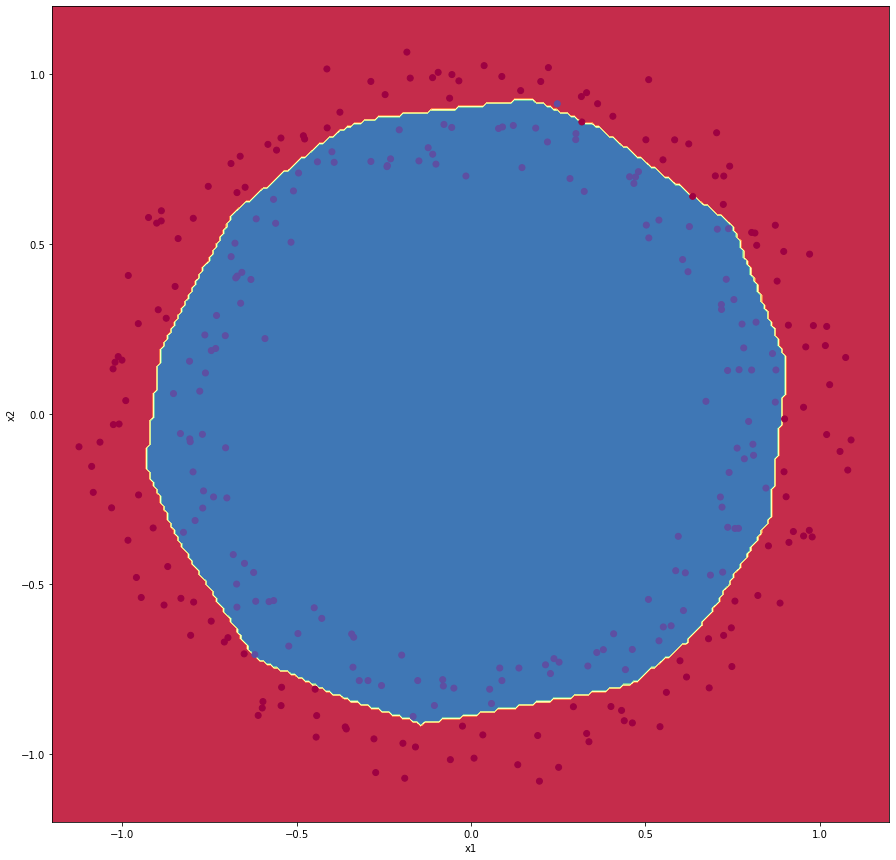

In [ ]:
axes = plt.gca()
axes.set_xlim([-1.2,1.2])
axes.set_ylim([-1.2,1.2])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

###Regularization

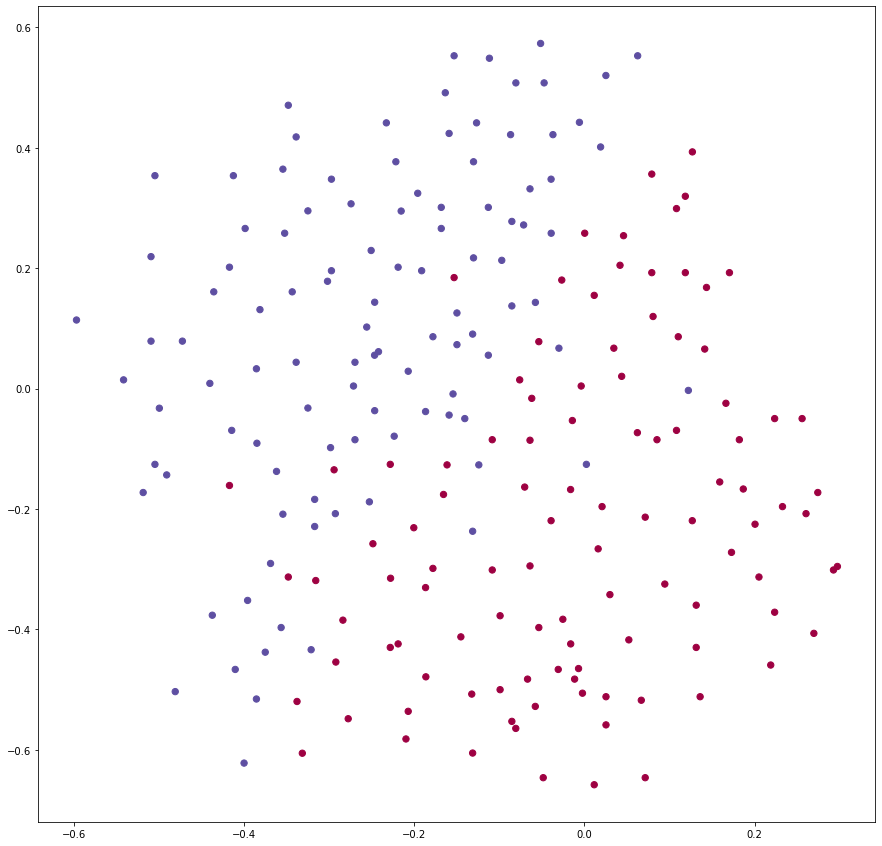

In [ ]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

####Model

In [ ]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 20, 3, 1]
    parameters = initialize_parameters(layers_dims)
    for i in range(0, num_iterations):
        if keep_prob:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
        assert(lambd==0 or keep_prob==1)

        if lambd == 0 and keep_prob:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

####Non-regularized

Cost after iteration 0: 0.8125812458748696
Cost after iteration 10000: 0.15408668715147153


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 20000: 0.13133279473950746


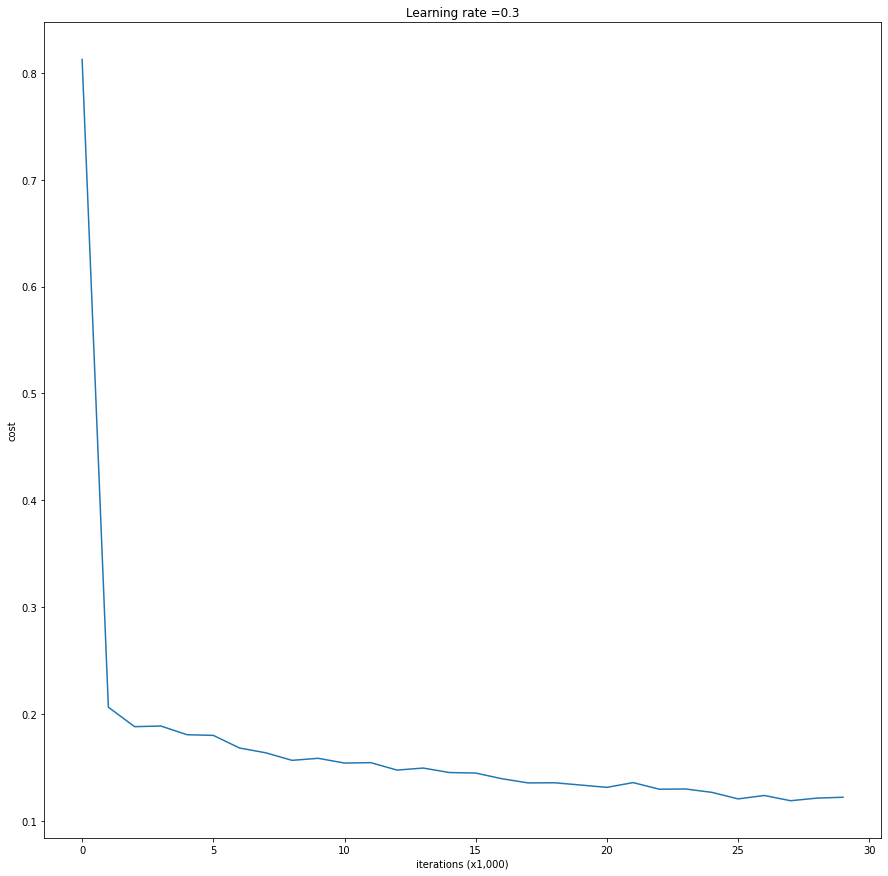

Train set:
Accuracy: 0.966824644549763
Test set:
Accuracy: 0.92


In [ ]:
parameters = model(train_X, train_Y)
print ("Train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("Test set:")
predictions_test = predict(test_X, test_Y, parameters)

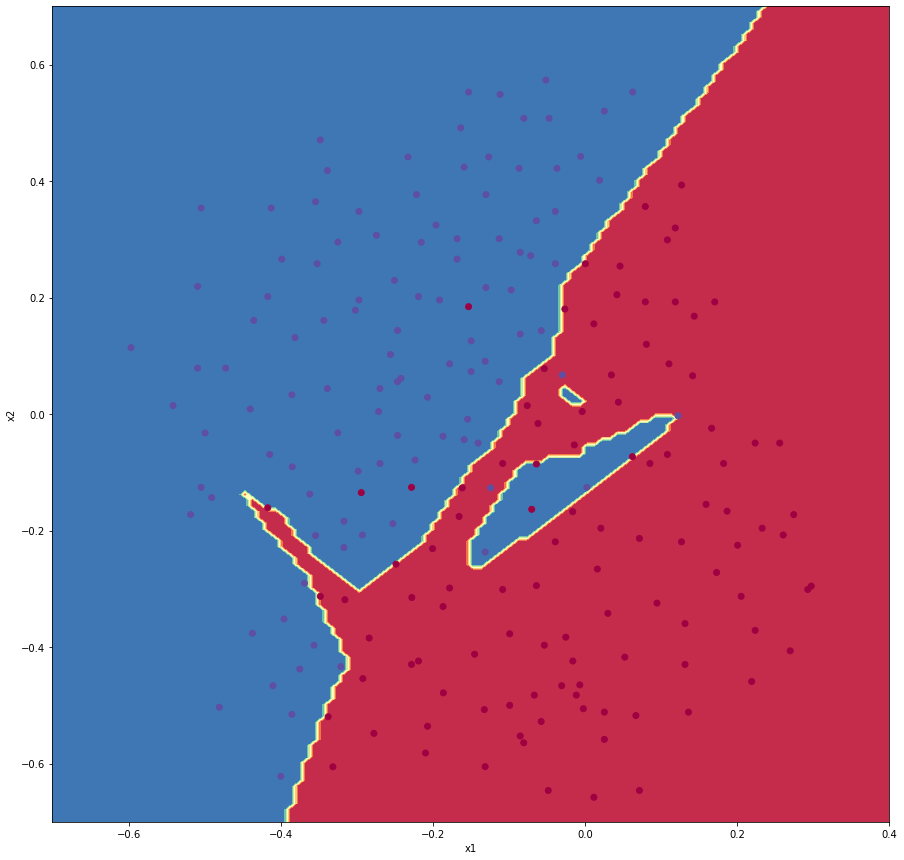

In [ ]:
axes = plt.gca()
axes.set_xlim([-0.7,0.4])
axes.set_ylim([-0.7,0.7])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

####L2 Regularization

Modify cost function:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost}$$


In [ ]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    return compute_cost(A3, Y) + lambd / (2*Y.shape[1]) * (np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2))

For each dW1, dW2, dW3, add regularization term's gradient 
$$\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$$


In [ ]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    m = X.shape[1]
    (Z1,A1,W1,b1,Z2,A2,W2,b2,Z3,A3,W3,b3) = cache

    dZ3 = A3 - Y
    dW3 = (dZ3 @ A2.T + lambd * W3) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m

    dA2 = W3.T @ dZ3
    dZ2 = dA2 * np.int64(A2 > 0)
    dW2 = (dZ2 @ A1.T + lambd * W2) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dA1 = W2.T @ dZ2
    dZ1 = dA1 * np.int64(A1 > 0)
    dW1 = (dZ1 @ X.T + lambd * W1) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

Cost after iteration 0: 1.0039383829874664
Cost after iteration 10000: 0.2648665604158171
Cost after iteration 20000: 0.2643630089123631


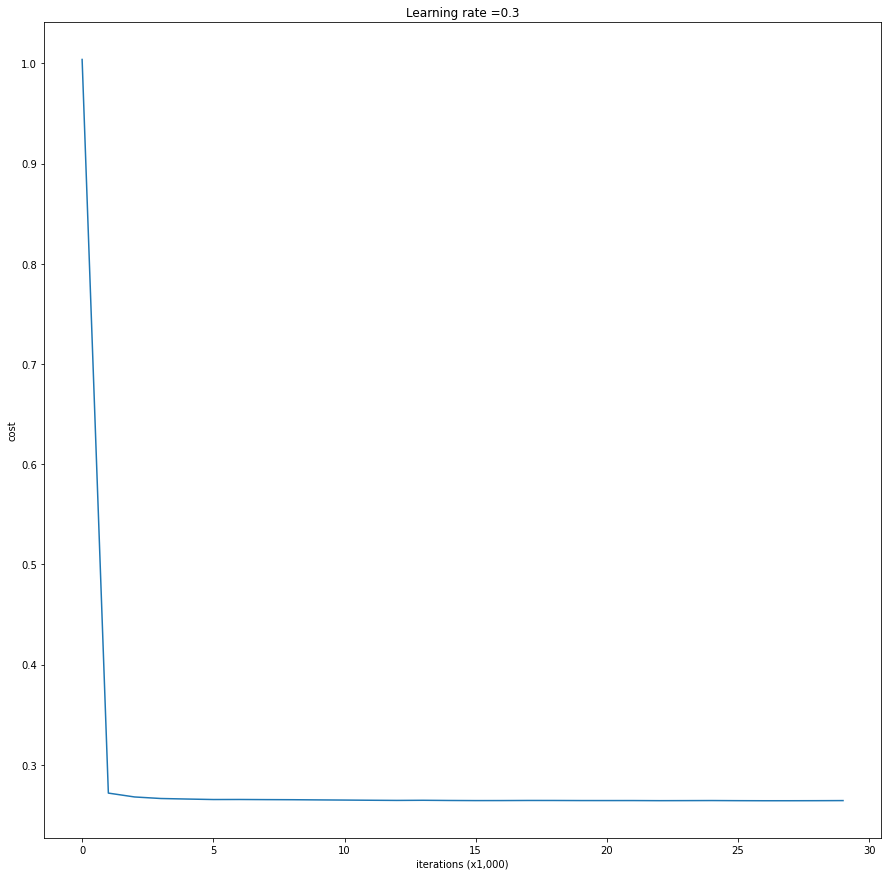

Train set:
Accuracy: 0.933649289099526
Test set:
Accuracy: 0.94


In [ ]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("Train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("Test set:")
predictions_test = predict(test_X, test_Y, parameters)

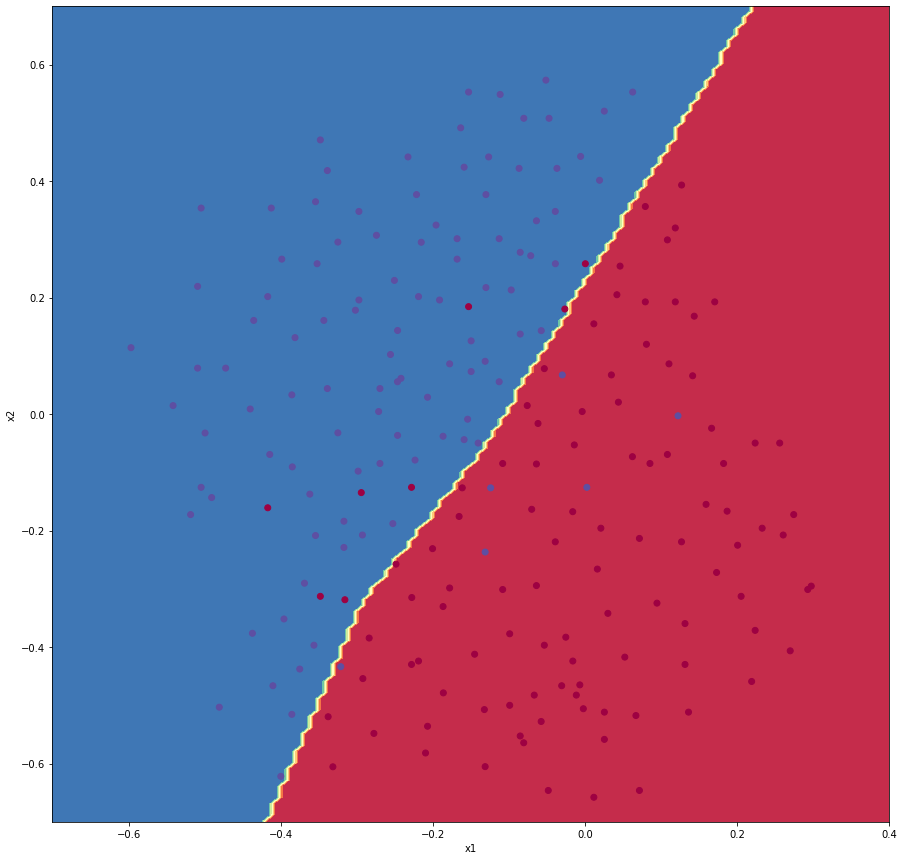

In [ ]:
axes = plt.gca()
axes.set_xlim([-0.7,0.4])
axes.set_ylim([-0.7,0.7])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

####Dropout

Forward propagation with dropout

- 3 layer, add dropout to 1st & 2nd hidden layers.

4 Steps:
1. Create a variable $d^{[1]}$ with same shape as $a^{[1]}$ using `np.random.rand()`. Use a vectorized implementation, create a random matrix 
$$D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $$
of same dimension as $A^{[1]}$.
2. Set each entry of $D^{[1]}$ to be 1 with probability (`keep_prob`), 0 otherwise.```keep_prob = 0.8```
- Keep 80%, drop out 20% neurons.
- Generate a vector 1 and 0, where 80% are 1, 20% are 0.
3. Set $A^{[1]}$ to $A^{[1]} * D^{[1]}$
4. Divide $A^{[1]}$ by `keep_prob` to assure that the cost still same expected value as without drop-out. (inverted dropout.)

In [ ]:
def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    Z1 = W1 @ X + b1
    D1 = np.random.rand(*A1.shape) < keep_prob
    A1 = relu(Z1) * D1 / keep_prob

    Z2 = W2 @ A1 + b2
    D2 = np.random.rand(*A2.shape) < keep_prob
    A2 = relu(Z2) * D2 / keep_prob

    Z3 = W3 @ A2 + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

1. Shut down the same neurons, by reapplying the same mask $D^{[1]}$ to `dA1`. 
2. During forward propagation, divided `A1` by `keep_prob`. In backpropagation, divide `dA1` by `keep_prob` again 

If $A^{[1]}$ is scaled by `keep_prob ->` derivative $dA^{[1]}$ is also scaled by the same `keep_prob`


In [ ]:
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = (dZ3 @ A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims = True) / m

    dA2 = (W3.T @ dZ3) * D2 / keep_prob
    dZ2 = dA2 * np.int64(A2 > 0)
    dW2 = (dZ2 @ A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims = True) / m
    
    dA1 = (W2.T @ dZ2) * D1 / keep_prob
    dZ1 = dA1 * np.int64(A1 > 0)
    dW1 = (dZ1 @ X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims = True) / m
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

Cost after iteration 0: 0.7067662426850229
Cost after iteration 10000: 0.14457692782163245
Cost after iteration 20000: 0.13243792422679151


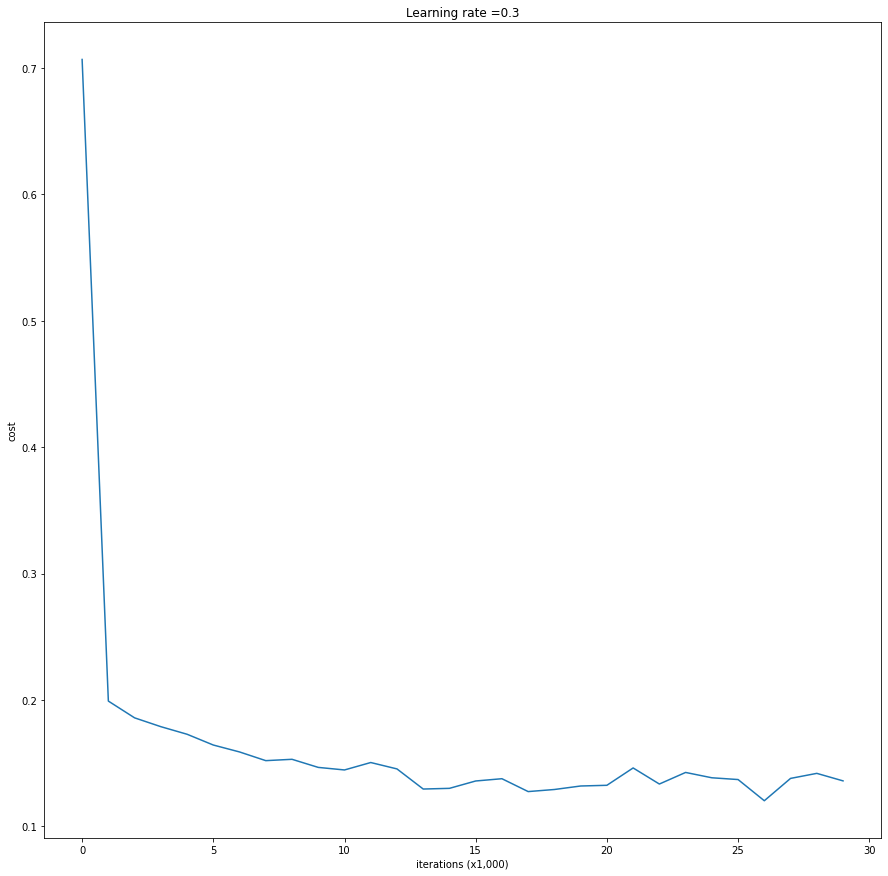

Train set:
Accuracy: 0.943127962085308
Test set:
Accuracy: 0.92


In [ ]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)
print ("Train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("Test set:")
predictions_test = predict(test_X, test_Y, parameters)

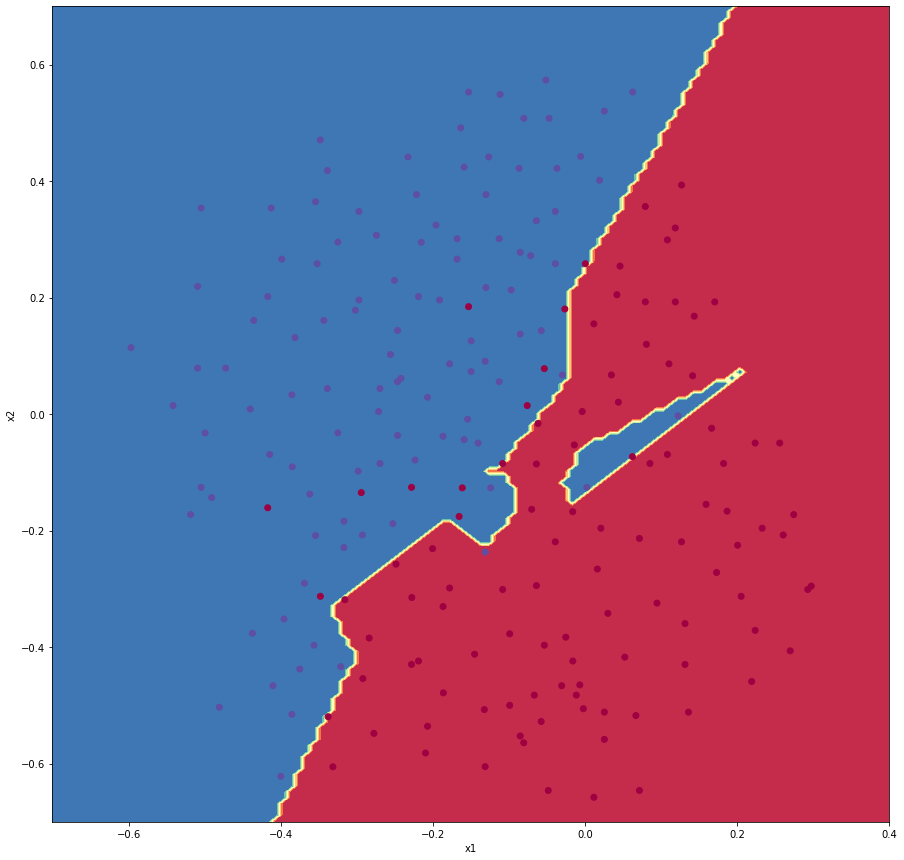

In [ ]:
axes = plt.gca()
axes.set_xlim([-0.7,0.4])
axes.set_ylim([-0.7,0.7])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

###Gradient Checking

Definition of a derivative (or gradient):
$$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} $$
- $\frac{\partial J}{\partial \theta}$ is to make sure computing correctly. 
- Can compute $J(\theta + \varepsilon)$ and $J(\theta - \varepsilon)$ (in case $\theta$ is a real number), since confident implementation for $J$ is correct.

####1-dimensional

1. $\theta^{+} = \theta + \varepsilon$
2. $\theta^{-} = \theta - \varepsilon$
3. $J^{+} = J(\theta^{+})$
4. $J^{-} = J(\theta^{-})$
5. $gradapprox = \frac{J^{+} - J^{-}}{2  \varepsilon}$
$$ difference = \frac {\mid\mid grad - gradapprox \mid\mid_2}{\mid\mid grad \mid\mid_2 + \mid\mid gradapprox \mid\mid_2} $$


In [ ]:
def forward_propagation(x, theta): return theta * x
def backward_propagation(x, theta): return x
def gradient_check(x, theta, epsilon = 1e-7):
    gradapprox = ((theta + epsilon) * x - (theta - epsilon) * x) / (2 * epsilon)
    difference = np.linalg.norm(gradapprox - x) / (np.linalg.norm(gradapprox) + np.linalg.norm(x))
    if difference < 1e-7:
        print("The gradient is correct!")
    else:
        print("The gradient is wrong!")
    return difference

####N-dimensional

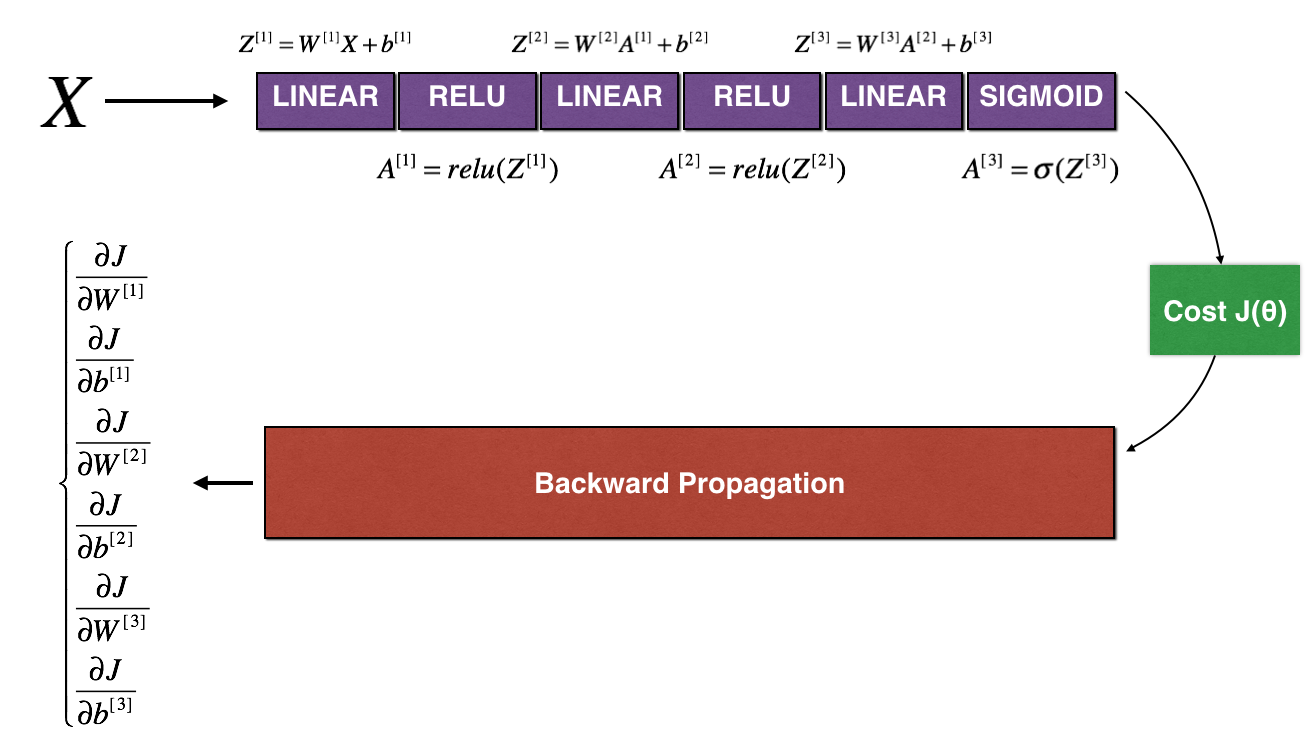

In [ ]:
def forward_propagation_n(X, Y, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    Z1 = W1 @ X + b1
    A1 = relu(Z1)
    Z2 = W2 @ A1 + b2
    A2 = relu(Z2)
    Z3 = W3 @ A2 + b3
    A3 = sigmoid(Z3)

    cost = np.sum(np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)) / X.shape[1]
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    return cost, cache

def backward_propagation_n(X, Y, cache):    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = (dZ3 @ A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims = True) / m
    
    dA2 = W3.T @ dZ3
    dZ2 = dA2 * np.int64(A2 > 0)
    dW2 = (dZ2 @ A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims = True) / m
    
    dA1 = W2.T @ dZ2
    dZ1 = dA1 * np.int64(A1 > 0)
    dW1 = (dZ1 @ X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims = True) / m
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

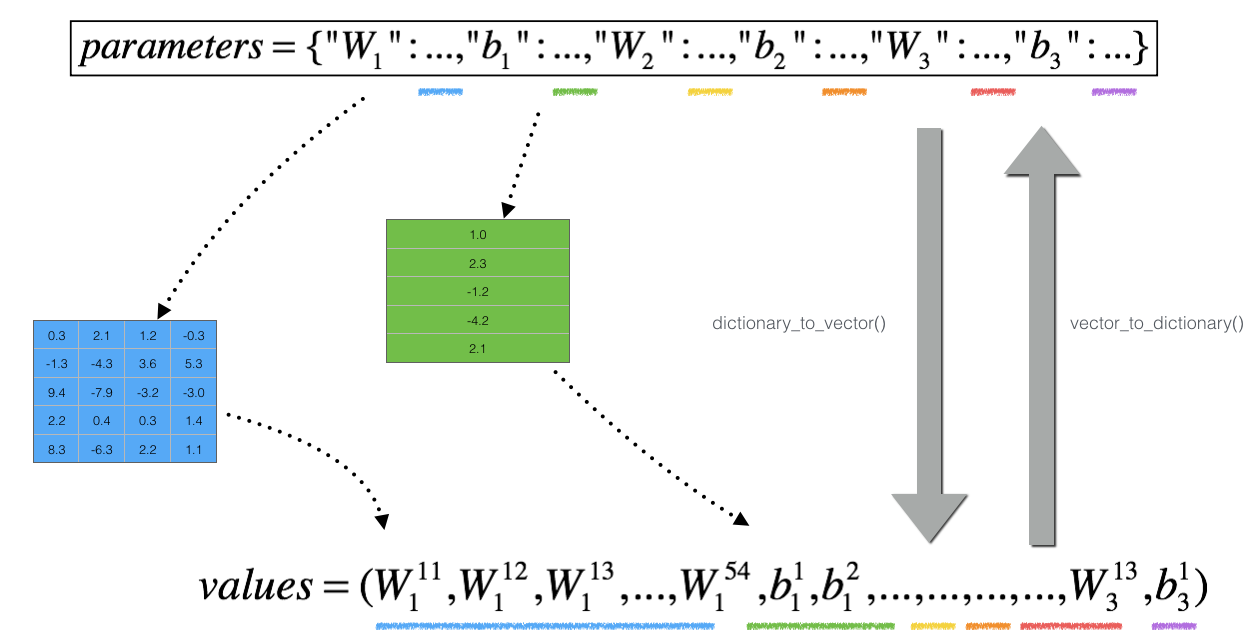

In [ ]:
def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    for i in range(num_parameters):
        thetaplus = np.copy(parameters_values)                                       # Step 1
        thetaplus[i][0] = thetaplus[i][0] + epsilon                                  # Step 2
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus))  # Step 3
        thetaminus = np.copy(parameters_values)                                       # Step 1
        thetaminus[i][0] = thetaminus[i][0] - epsilon                                 # Step 2
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus)) # Step 3
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2 * epsilon)
    numerator = np.linalg.norm(grad - gradapprox)                       # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)     # Step 2'
    difference = numerator / denominator                                  # Step 3'
    
    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    return difference

##W2: Optimization

###Gradient Descent

In [ ]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    for l in range(len(parameters) // 2):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads['dW' + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads['db' + str(l+1)]   
    return parameters

Stochastic Gradient Descent (SGD): mini-batch GD where each mini-batch has just 1 example. Compute gradients on just 1 training example at a time, rather than on the whole training set.

When the training set is large, SGD can be faster. But the parameters will "oscillate" toward the minimum rather than converge smoothly. 

SGD requires 3 for-loops in total:
1. Over the number of iterations
2. Over the $m$ training examples
3. Over the layers (to update all parameters, from $(W^{[1]},b^{[1]})$ to $(W^{[L]},b^{[L]})$)
```
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
```
- **(Batch) GD**:
``` python
for i in range(0, num_iterations):
    a, caches = forward_propagation(X, parameters)
    cost += compute_cost(a, Y)
```
- **SGD**:
```python
for i in range(0, num_iterations):
    for j in range(0, m):
        a, caches = forward_propagation(X[:,j], parameters)
        cost += compute_cost(a, Y[:,j])
```

```
grads = backward_propagation(a, caches, parameters)
parameters = update_parameters(parameters, grads)
```


###Mini-batch GD

There are two steps:
- **Shuffle**: Create a shuffled version of the training set (X, Y). Each column of X & Y represents a training example. Shuffling is done synchronously between X & Y. After shuffling the $i^{th}$ column of X is the example corresponding to the $i^{th}$ label in Y. Ensure that examples split randomly into different mini-batches. 

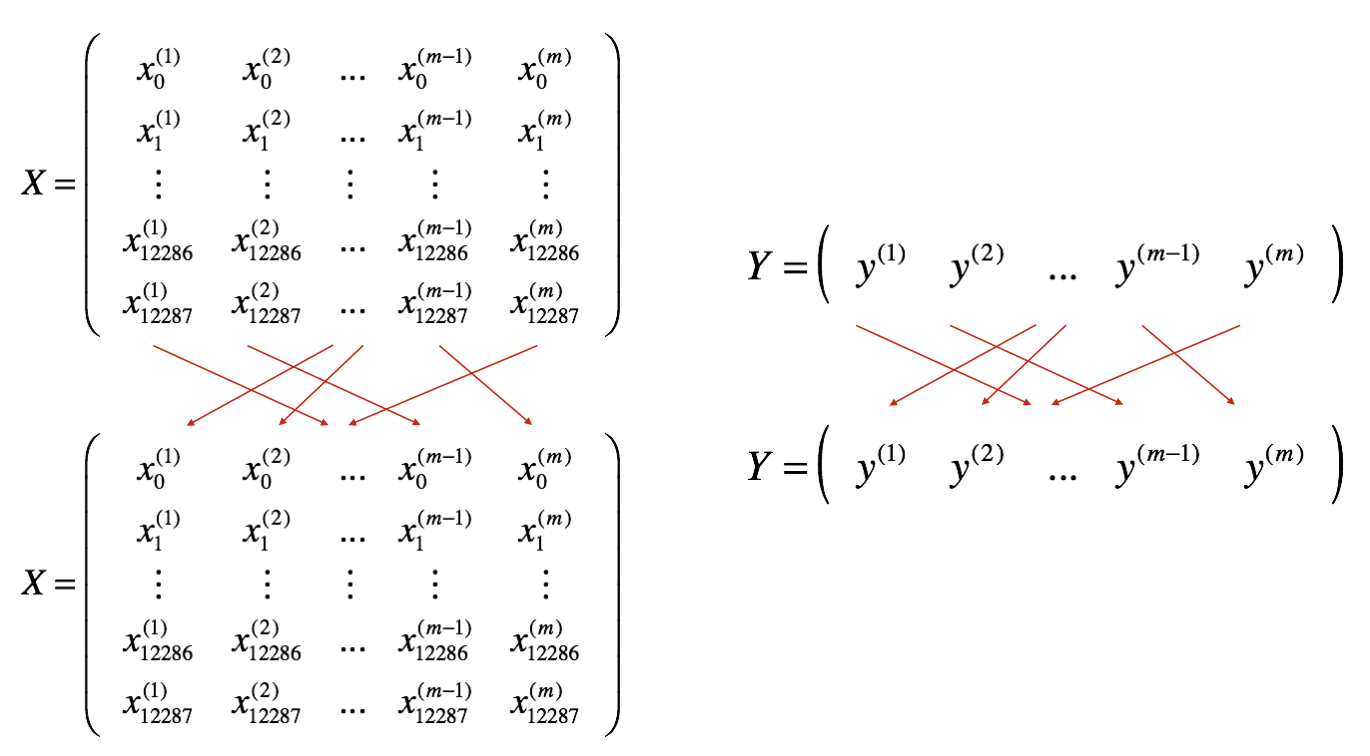

- **Partition**: Partition the shuffled (X, Y) into mini-batches of size `mini_batch_size` (here 64)

The last mini-batch smaller than `mini_batch_size=64`

$\lfloor s \rfloor$ = rounded down / `math.floor(s)`

$\lfloor \frac{m}{mini\_batch\_size}\rfloor$ mini-batches with full 64

No. examples in final mini-batch:
$m-mini_\_batch_\_size \times \lfloor \frac{m}{mini\_batch\_size}\rfloor$

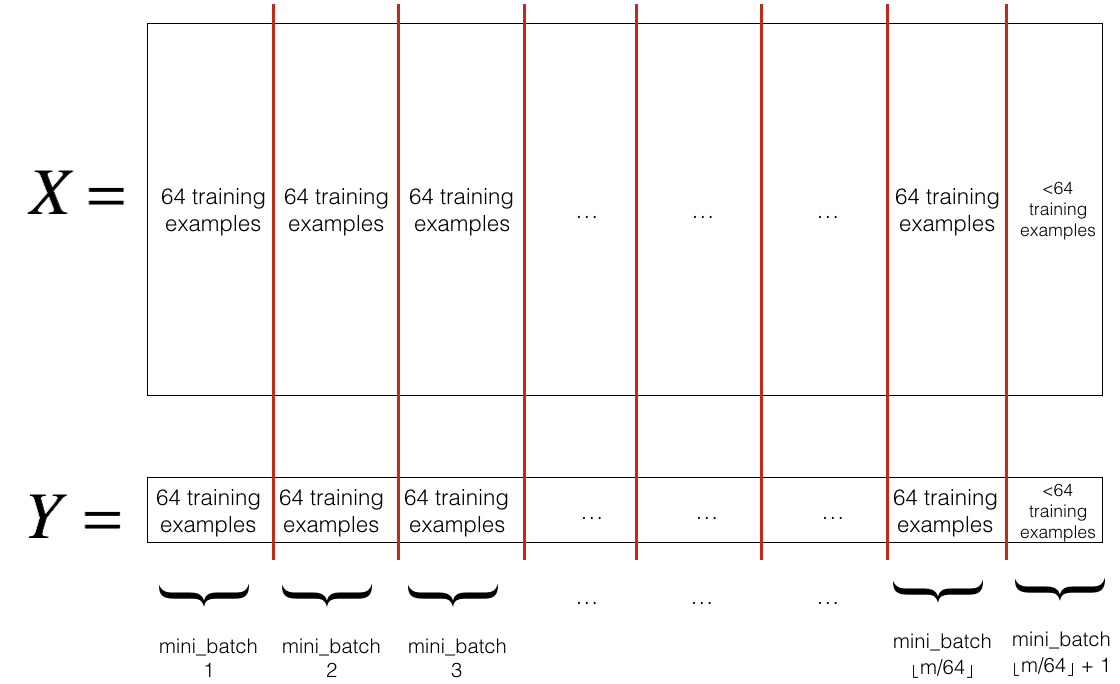

In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    m = X.shape[1]
    mini_batches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    num_complete_minibatches = math.floor(m / mini_batch_size)
    for k in range(num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batches.append((mini_batch_X, mini_batch_Y))
    if m % mini_batch_size:
        mini_batch_X = shuffled_X[:, int(m / mini_batch_size) * mini_batch_size :]
        mini_batch_Y = shuffled_Y[:, int(m / mini_batch_size) * mini_batch_size :]
        mini_batches.append((mini_batch_X, mini_batch_Y))
    return mini_batches

###Momentum

Mini-batch GD makes a parameter update after seeing just a subset of examples 

`->` direction of the update has some variance 

`->` the path will "oscillate" toward convergence.

Momentum takes into account the past gradients to smooth out the update. 

Store the 'direction' of the previous gradients in the variable $v$ - exponentially weighted average of the gradient on previous steps.

`->` the "velocity" of a ball rolling downhill, building up speed (and momentum) according to the direction of the slope of the hill. 

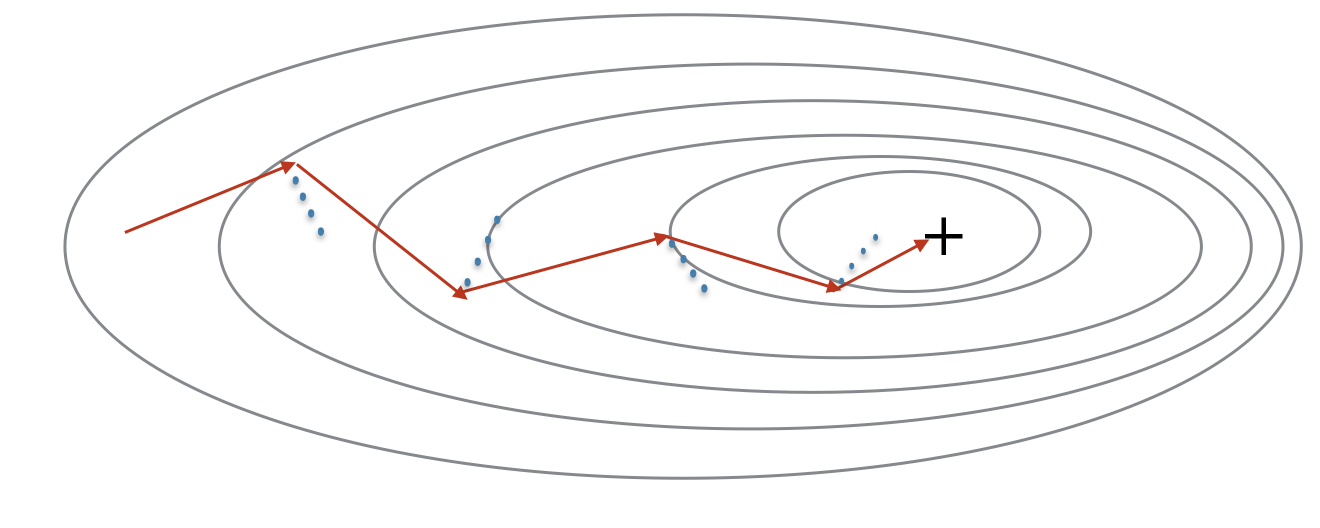

Red arrows - direction taken by one step of mini-batch GD with momentum. 

Blue points - direction of the gradient on each step. 

`->` Let the gradient influence $v$ and then take a step in the direction of $v$.

In [ ]:
def initialize_velocity(parameters):
    v = {}
    for l in range(len(parameters) // 2):
        v["dW"+str(l+1)] = np.zeros_like(parameters["W"+str(l+1)])
        v["db"+str(l+1)] = np.zeros_like(parameters["b"+str(l+1)])
    return v

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

Iterator `l` starts at 0 in the `for` loop while the first parameters are $W^{[1]}$ and $b^{[1]}$ `->` shift `l` to `l+1`

In [ ]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    for l in range(len(parameters) // 2):
        z = str(l+1)
        v['dW'+z] = beta * v['dW'+z] + (1 - beta) * grads['dW'+z]
        v['db'+z] = beta * v['db'+z] + (1 - beta) * grads['db'+z]
        parameters['W'+z] = parameters['W'+z] - learning_rate * v['dW'+z]
        parameters['b'+z] = parameters['b'+z] - learning_rate * v['db'+z]
    return parameters, v

###Adam

In [ ]:
def initialize_adam(parameters) :
    v = {}
    s = {}
    for l in range(len(parameters) // 2):
        z = str(l+1)
        v["dW"+z] = np.zeros_like(parameters["W"+z])
        v["db"+z] = np.zeros_like(parameters["b"+z])
        s["dW"+z] = np.zeros_like(parameters["W"+z])
        s["db"+z] = np.zeros_like(parameters["b"+z])    
    return v, s


1. Calculate exponentially weighted average of past gradients, stores in $v$ (before) & $v^{corrected}$ (with) bias correction
2. Calculate exponentially weighted average of the squares of the past gradients, stores in $s$ (before) & $s^{corrected}$ (with) bias correction
3. Update parameters:
$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
- t counts no. steps taken of Adam 
- L - no. layers
- $\beta_1$ and $\beta_2$ control 2 exponentially weighted averages. 
- $\alpha$ - learning rate
- $\varepsilon$ - small number to avoid dividing by zero

In [ ]:
def update_parameters_with_adam(
    parameters, grads, v, s, t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):    
    v_corrected = {}
    s_corrected = {}
    for l in range(len(parameters) // 2):
        z = str(l+1)
        v["dW"+z] = beta1 * v["dW"+z] + (1 - beta1) * grads['dW'+z]
        v["db"+z] = beta1 * v["db"+z] + (1 - beta1) * grads['db'+z]
        v_corrected["dW"+z] = v["dW"+z] / (1 - beta1 ** t)
        v_corrected["db"+z] = v["db"+z] / (1 - beta1 ** t)
        s["dW"+z] = beta2 * s["dW"+z] + (1 - beta2) * grads['dW'+z] ** 2
        s["db"+z] = beta2 * s["db"+z] + (1 - beta2) * grads['db'+z] ** 2
        s_corrected["dW"+z] = s["dW"+z] / (1 - beta2 ** t)
        s_corrected["db"+z] = s["db"+z] / (1 - beta2 ** t)
        parameters["W"+z] = parameters["W"+z] - learning_rate * v_corrected["dW"+z] / (np.sqrt(s_corrected["dW"+z]) + epsilon)
        parameters["b"+z] = parameters["b"+z] - learning_rate * v_corrected["db"+z] / (np.sqrt(s_corrected["db"+z]) + epsilon)
    return parameters, v, s

###Model

In [ ]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    costs = []
    t = 0
    m = X.shape[1]
    print("Number of training examples:", m)
    print("\nMini-batch size:", mini_batch_size)
    parameters = initialize_parameters(layers_dims)
    if optimizer == "gd":
        pass
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    for i in range(num_epochs):
        minibatches = random_mini_batches(X, Y, mini_batch_size)
        cost_total = 0
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            a3, caches = forward_propagation(minibatch_X, parameters)
            cost_total += compute_cost(a3, minibatch_Y)
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1
                parameters, v, s = update_parameters_with_adam(
                    parameters, grads, v, s, t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    return parameters

###Test

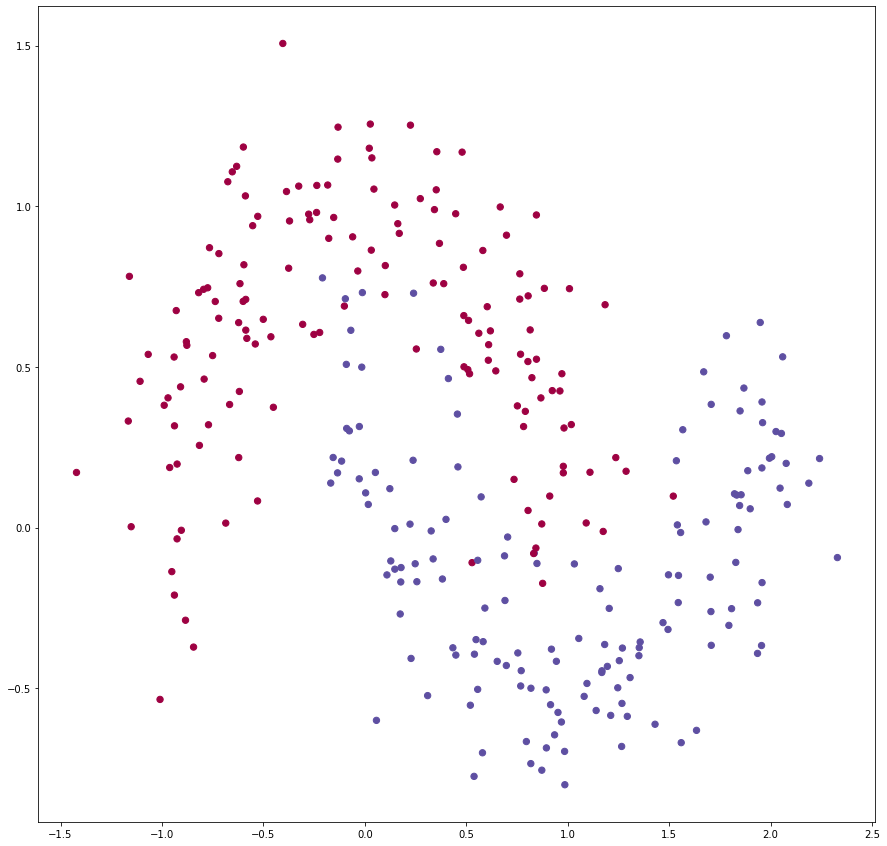

In [ ]:
train_X, train_Y = load_moons_dataset()

Number of training examples: 300

Mini-batch size: 64
Cost after epoch 0: 0.013626
Cost after epoch 1000: 0.009143
Cost after epoch 2000: 0.008119
Cost after epoch 3000: 0.007320
Cost after epoch 4000: 0.006614
Cost after epoch 5000: 0.005996
Cost after epoch 6000: 0.005686
Cost after epoch 7000: 0.005279
Cost after epoch 8000: 0.005270
Cost after epoch 9000: 0.005060


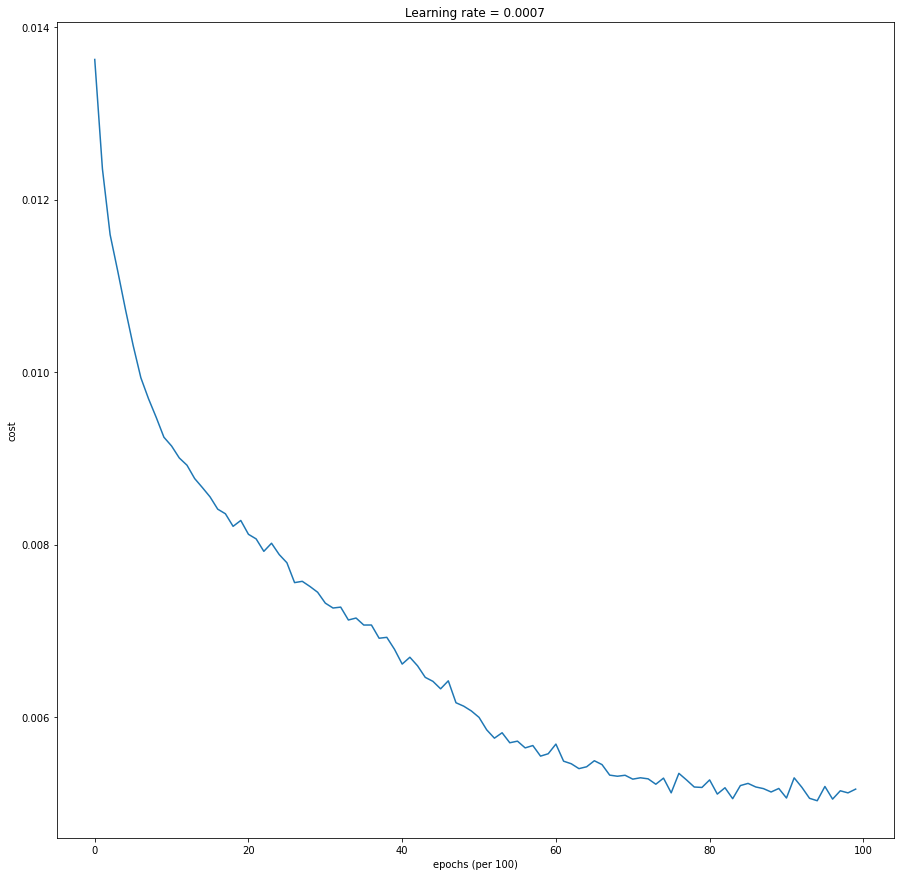

Accuracy: 0.8566666666666667


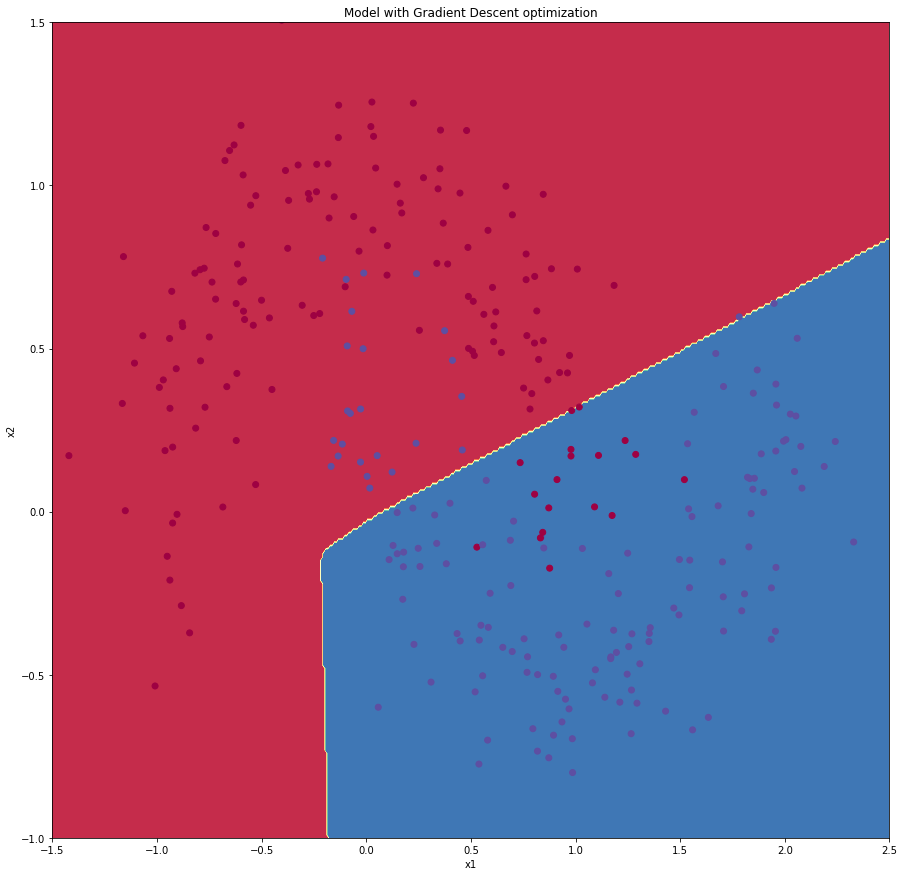

In [ ]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")
predictions = predict(train_X, train_Y, parameters)
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Number of training examples: 300

Mini-batch size: 64
Cost after epoch 0: 0.016025
Cost after epoch 1000: 0.009369
Cost after epoch 2000: 0.008445
Cost after epoch 3000: 0.007630
Cost after epoch 4000: 0.007207
Cost after epoch 5000: 0.006561
Cost after epoch 6000: 0.006253
Cost after epoch 7000: 0.006115
Cost after epoch 8000: 0.005842
Cost after epoch 9000: 0.005693


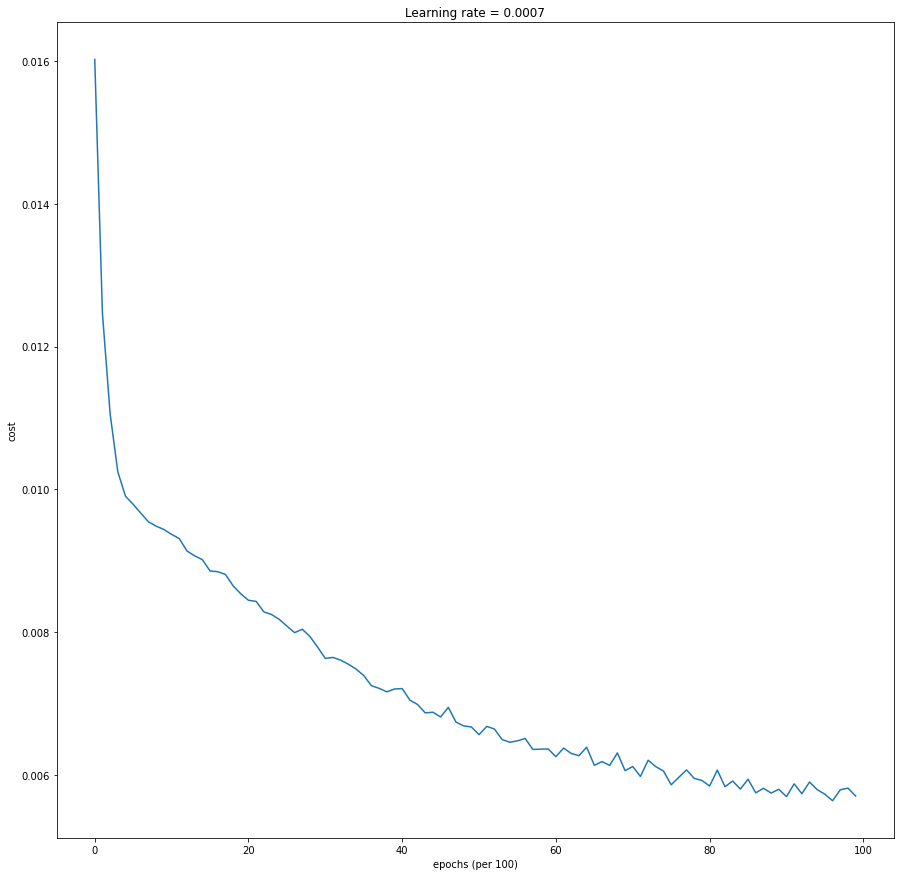

Accuracy: 0.86


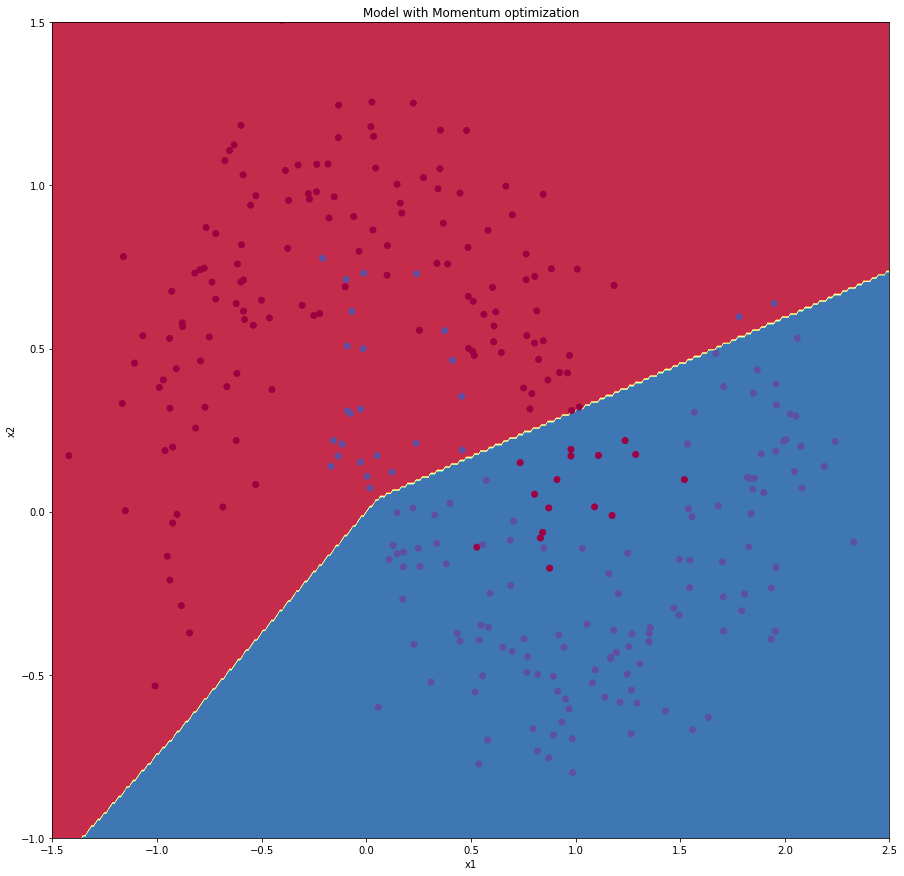

In [ ]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")
predictions = predict(train_X, train_Y, parameters)
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Number of training examples: 300

Mini-batch size: 64
Cost after epoch 0: 0.009926
Cost after epoch 1000: 0.005817
Cost after epoch 2000: 0.001962
Cost after epoch 3000: 0.001659
Cost after epoch 4000: 0.001665
Cost after epoch 5000: 0.001602
Cost after epoch 6000: 0.001540
Cost after epoch 7000: 0.001516
Cost after epoch 8000: 0.001637
Cost after epoch 9000: 0.001677


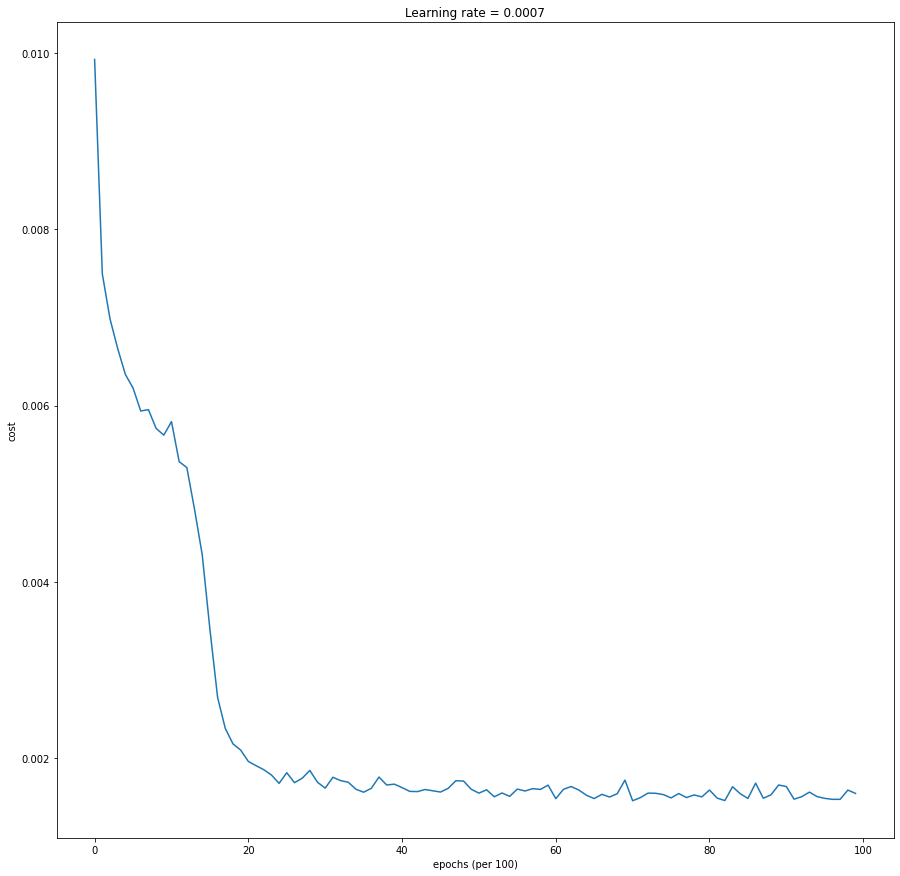

Accuracy: 0.9633333333333334


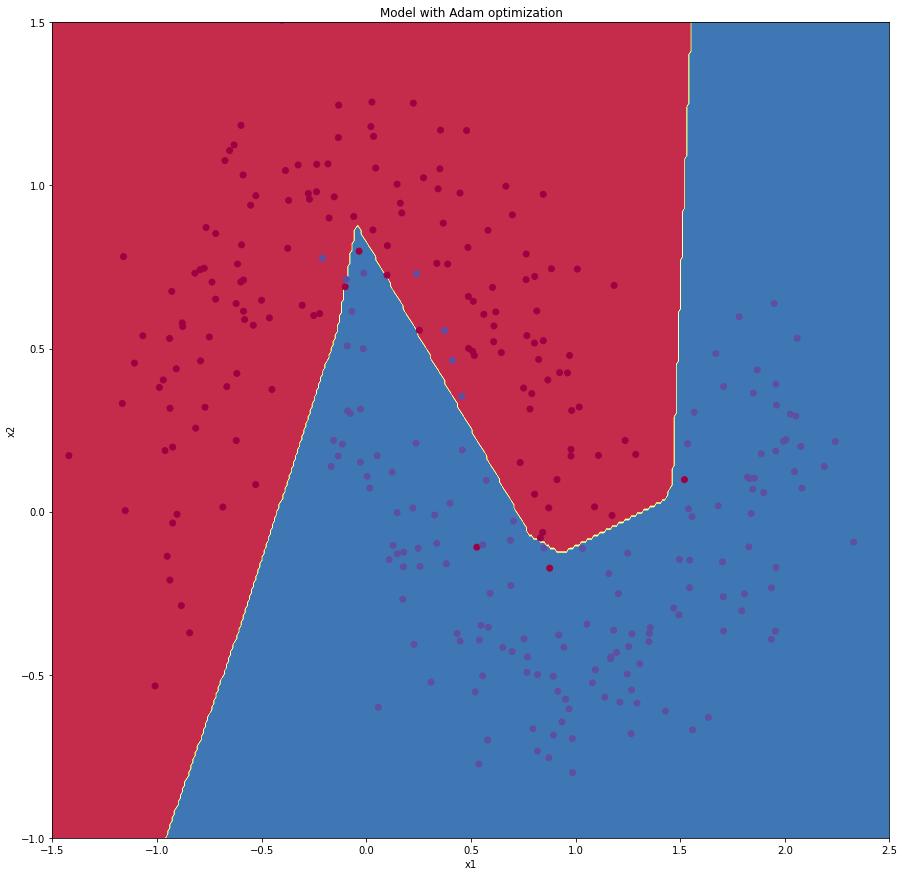

In [ ]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")
predictions = predict(train_X, train_Y, parameters)
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

#C4: CNN

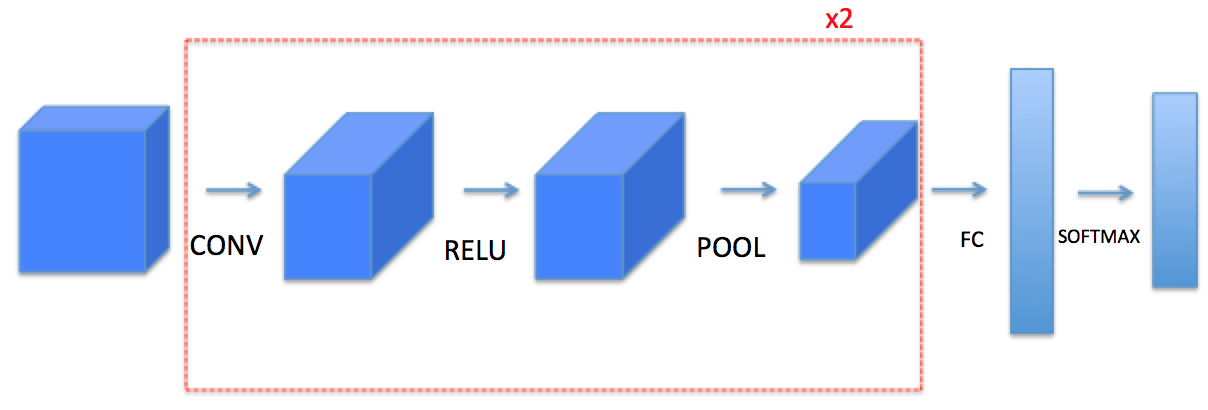

###Notation

- Superscript $[l]$ - $l^{th}$ layer. 
    - $a^{[4]}$ - $4^{th}$ layer activation
    - $W^{[5]}$ and $b^{[5]}$ - $5^{th}$ layer parameters.
- Superscript $(i)$ - $i^{th}$ example. 
    - $x^{(i)}$ - $i^{th}$ training example input.    
- Subscript $i$ - $i^{th}$ entry of a vector.
    - $a^{[l]}_i$ - $i^{th}$ entry of the activations in layer $l$, assuming this is a fully connected (FC) layer.    
- $n_H$, $n_W$, $n_C$ - height, width, no. channels of a layer.
    - A specific layer $l$: write $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$. 
- $n_{H_{prev}}$, $n_{W_{prev}}$, $n_{C_{prev}}$ - of the previous layer
    - or write $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$. 

###Padding, Filter, Forward Pass

####Zero-Padding

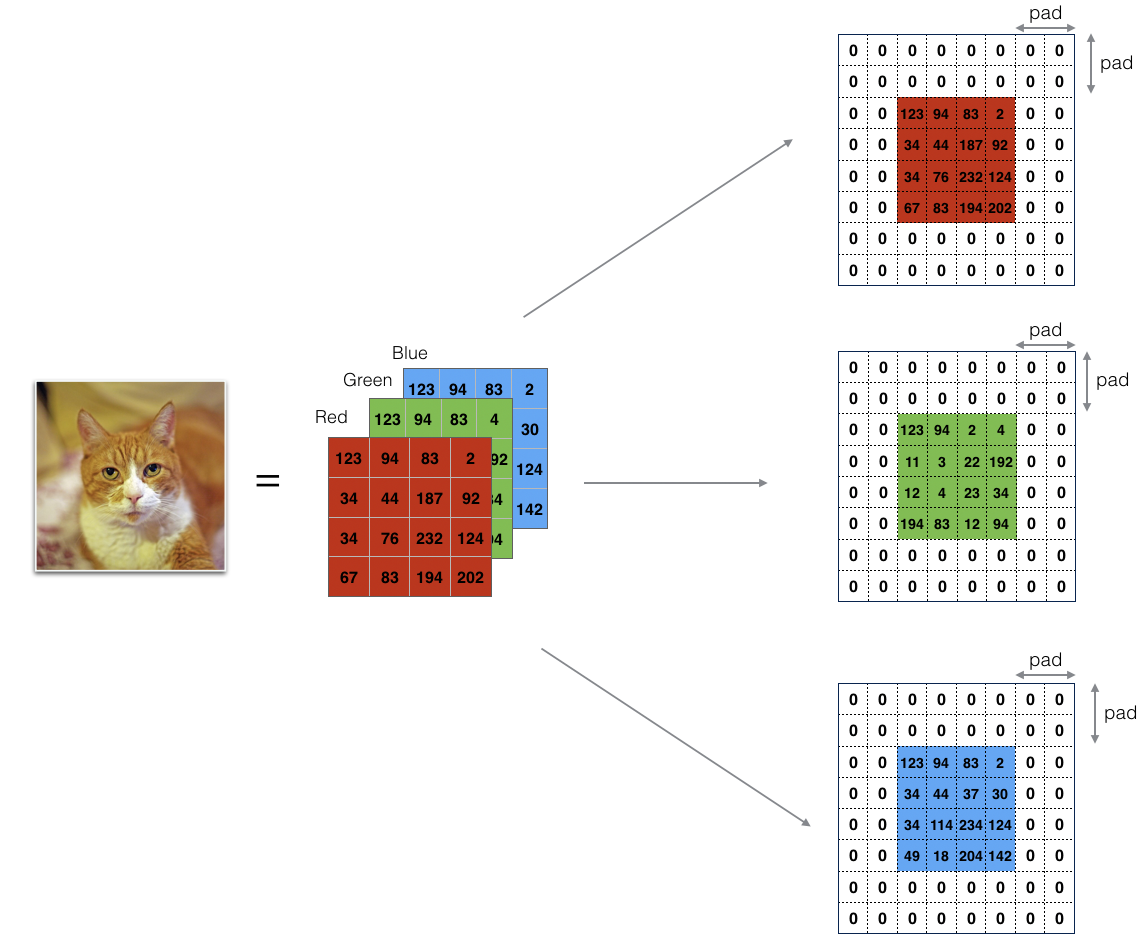

In [ ]:
def zero_pad(X, pad): return np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=(0,0))

Argument:
- X -- shape `(m, n_H, n_W, n_C)` representing a batch of m images
- pad -- amount of padding around each image on vertical, horizontal dimensions

Returns:
- X_pad -- padded image of shape `(m, n_H + 2 * pad, n_W + 2 * pad, n_C)`

####Filter

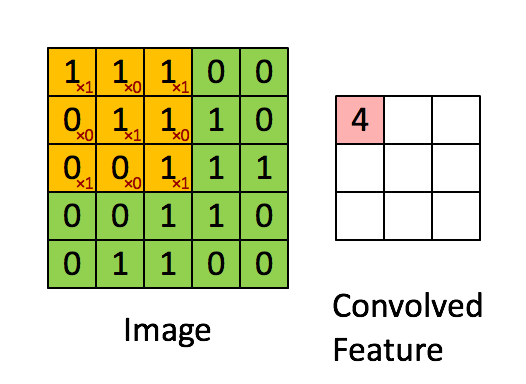

In [ ]:
def conv_single_step(a_slice_prev, W, b):
    return np.sum(np.multiply(a_slice_prev, W)) + np.squeeze(b)

Apply one filter defined by parameters W on a single slice `(a_slice_prev)` of output activation of previous layer.

Arguments:
- a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
- W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
- b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)

Returns:
- Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data

####Forward Pass

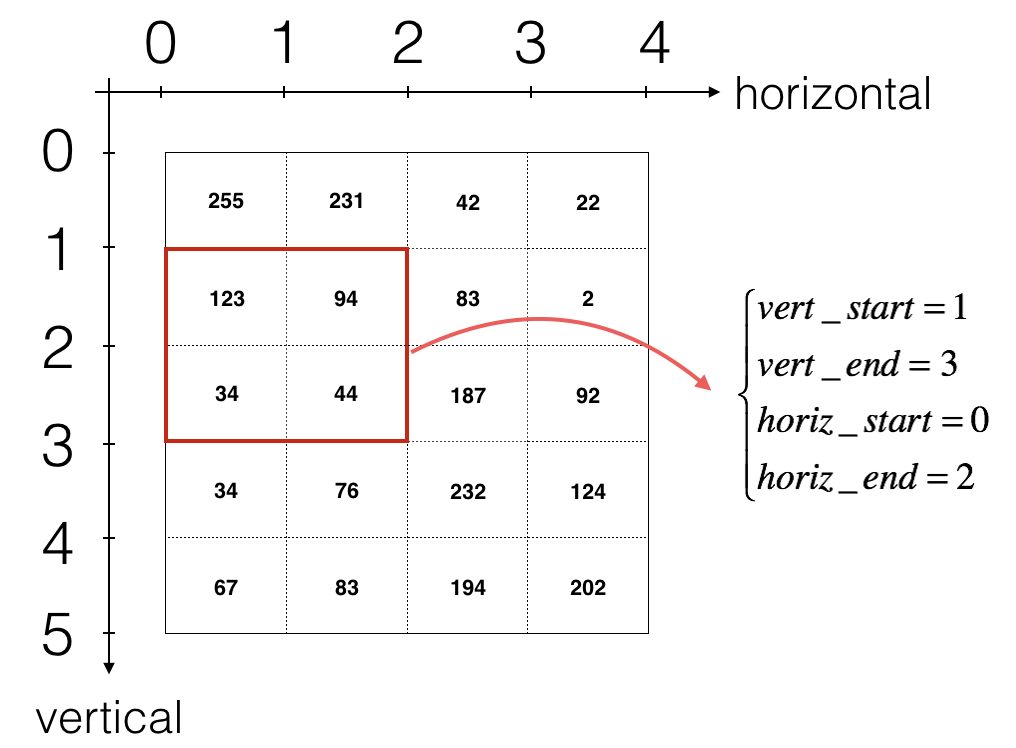

$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_C = \text{number of filters used in the convolution}$$

In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    stride = hparameters['stride']
    pad = hparameters['pad']
    n_H = int((n_H_prev + 2 * pad - f) / stride) + 1
    n_W = int((n_W_prev + 2 * pad - f) / stride) + 1
    Z = np.zeros((m, n_H, n_W, n_C))
    A_prev_pad = zero_pad(A_prev, pad)
    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):
            vert_start = stride * h
            vert_end = vert_start + f
            for w in range(n_W):
                horiz_start = stride * w
                horiz_end = horiz_start + f
                for c in range(n_C):
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, : ]
                    weights = W[ :, :, :, c]
                    biases = b[ :, :, :, c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)
    cache = (A_prev, W, b, hparameters)
    return Z, cache

Arguments:
- A_prev -- output activations of previous layer, shape `(m, n_H_prev, n_W_prev, n_C_prev)`
- W -- Weights, shape `(f, f, n_C_prev, n_C)`
- b -- Biases, shape `(1, 1, 1, n_C)`
- hparameters -- dictionary containing "stride" and "pad"
    
Returns:
- Z -- conv output, shape `(m, n_H, n_W, n_C)`
- cache -- values needed for `conv_backward()` function

###Pooling

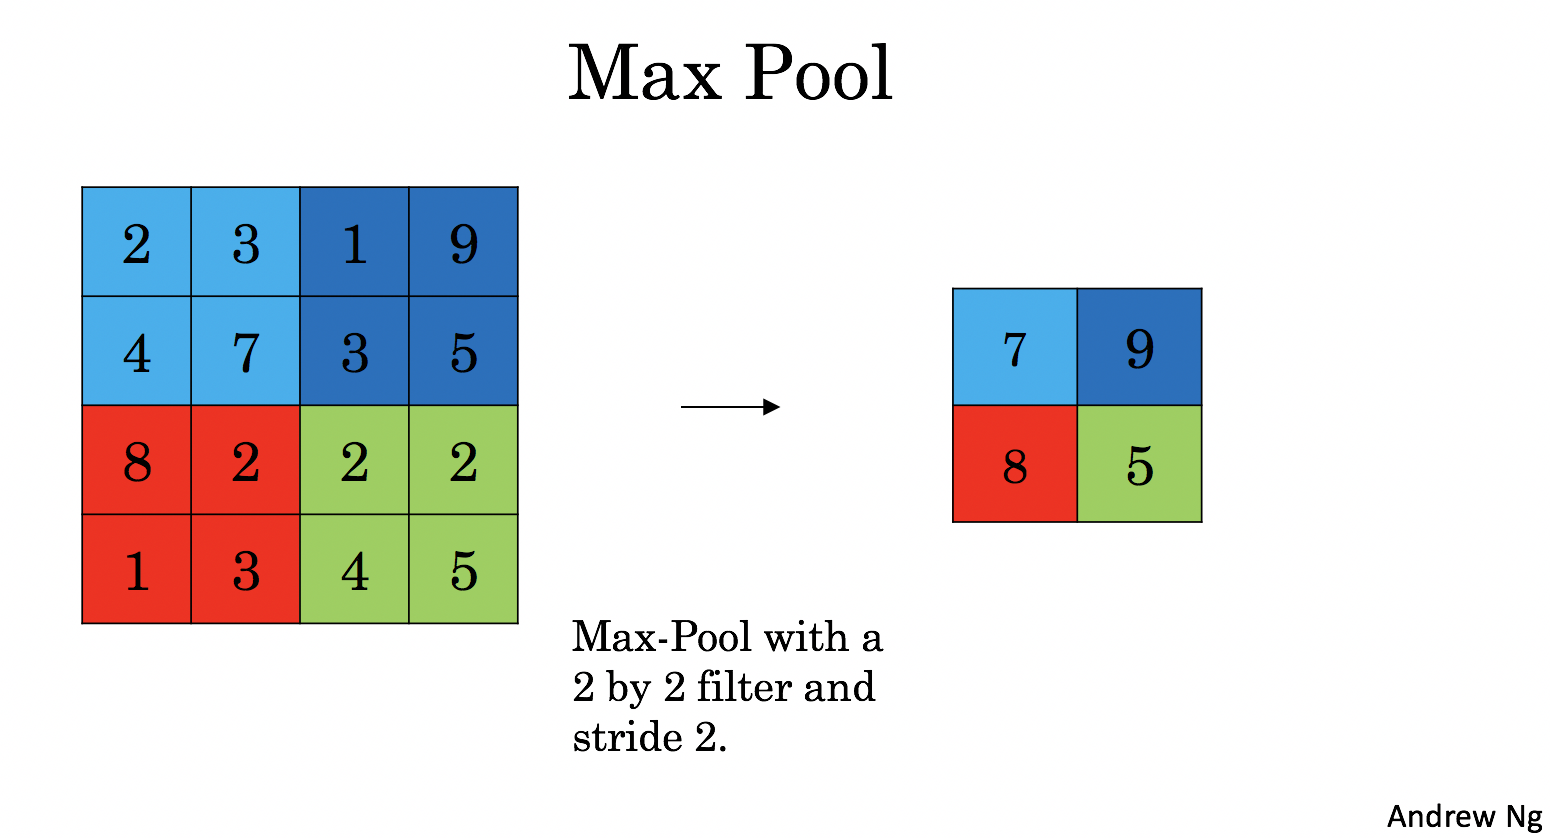

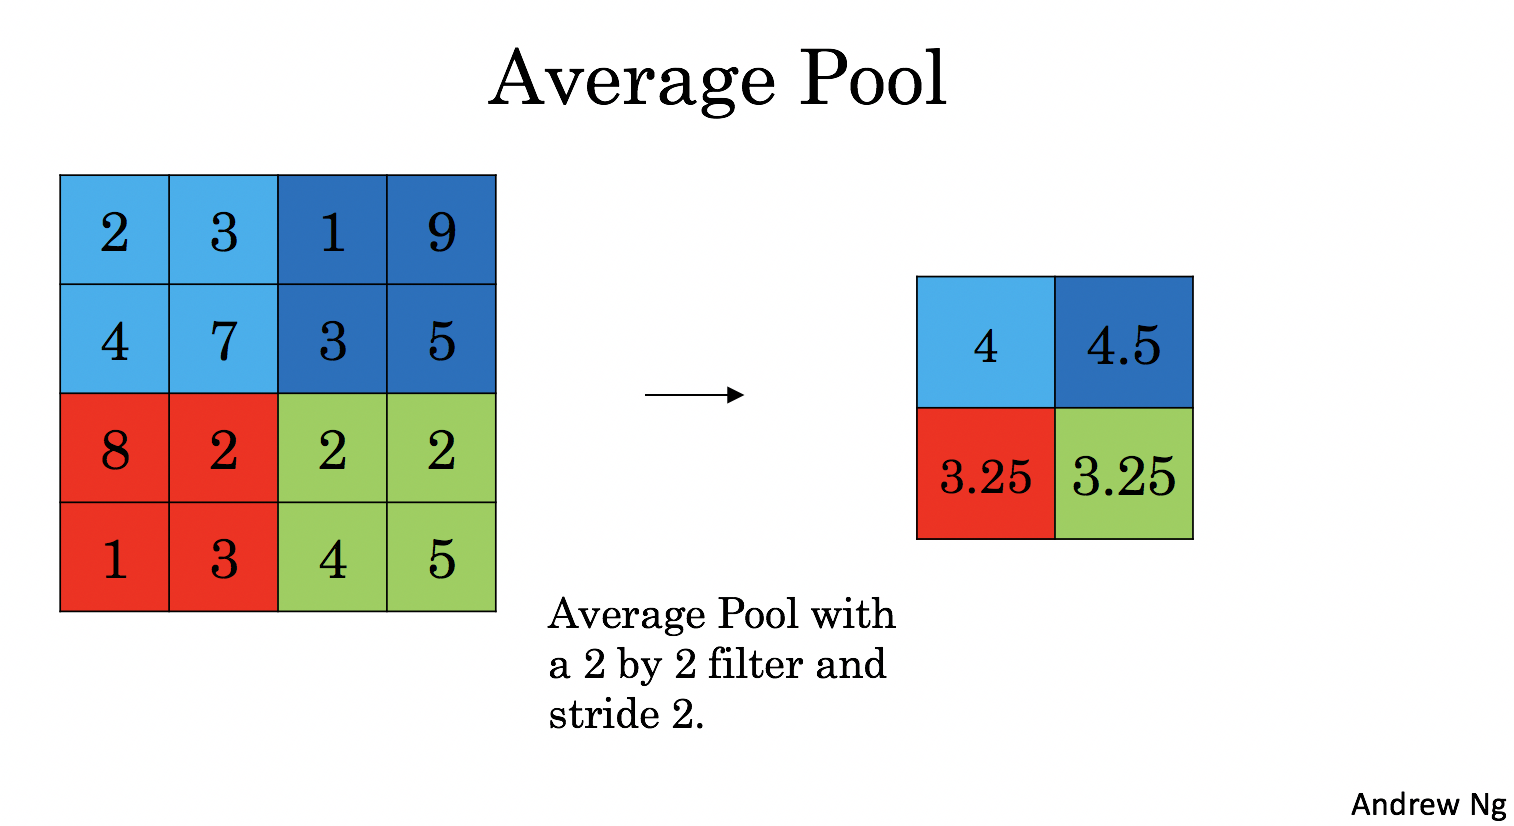

$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f}{stride} \Bigr\rfloor +1$$
$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f}{stride} \Bigr\rfloor +1$$
$$n_C = n_{C_{prev}}$$

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    f = hparameters["f"]
    stride = hparameters["stride"]
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    A = np.zeros((m, n_H, n_W, n_C))              
    for i in range(m):
        for h in range(n_H):
            vert_start = h * stride
            vert_end = vert_start + f
            for w in range(n_W):
                horiz_start = w * stride 
                horiz_end = horiz_start + f
                for c in range(n_C): 
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    cache = (A_prev, hparameters)
    return A, cache

#C5: Sequence Models

###Utilities

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def sigmoid(x): return 1 / (1 + np.exp(-x))

def initialize_adam(parameters) :
    v = {}
    s = {}
    for l in range(len(parameters) // 2):
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
    return v, s

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    v_corrected = {}
    s_corrected = {}
    for l in range(len(parameters) // 2):
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads["dW" + str(l+1)] 
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads["db" + str(l+1)] 
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1 ** t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1 ** t)
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * (grads["dW" + str(l+1)] ** 2)
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * (grads["db" + str(l+1)] ** 2)
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - beta2 ** t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - beta2 ** t)
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v_corrected["dW" + str(l+1)] / np.sqrt(s_corrected["dW" + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v_corrected["db" + str(l+1)] / np.sqrt(s_corrected["db" + str(l+1)] + epsilon)
    return parameters, v, s

##RNN

###Overview

- Superscript $[l]$ - layer, $(i)$ - example, $\langle t \rangle$ - time step
- Subscript $i$ - entry of a vector
    - $a^{(2)[3]<4>}_5$ - activation of 2nd training example, 3rd layer, 4th time step, 5th entry in the vector

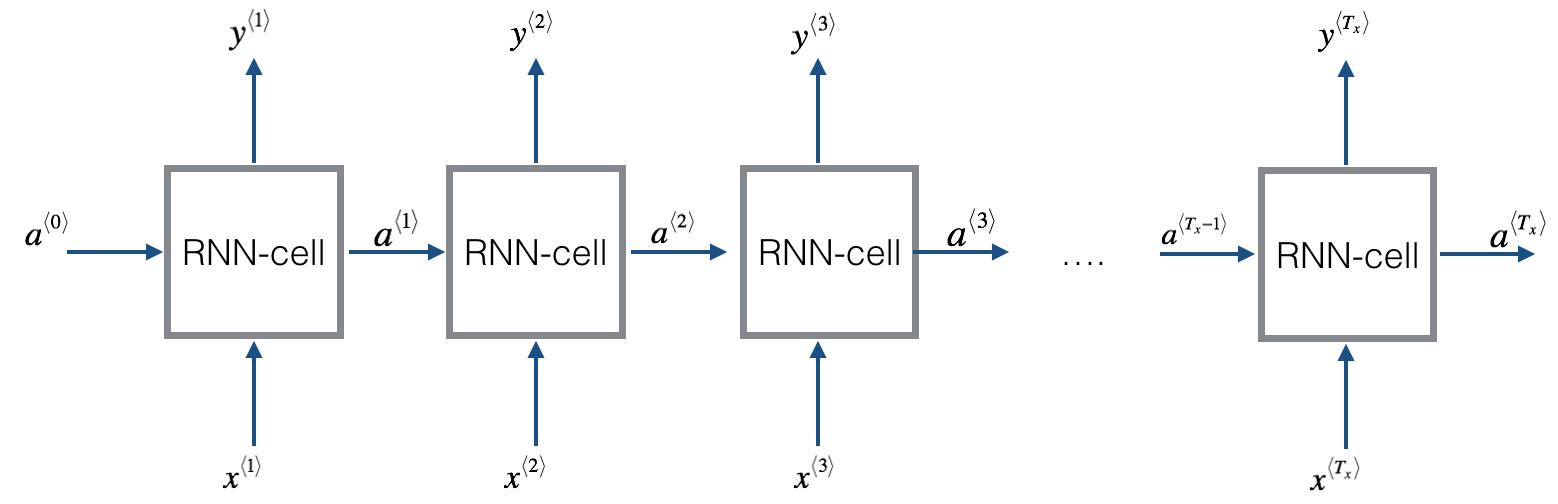


####Dimensions of input $x$
Input with $n_x$ no. units
* A language with 5000-word vocab one-hot encoded into a vector $n_x$ = 5000 units
* For a single time step of a single input example, $x^{(i) \langle t \rangle }$ - 1dim input vector shape `(5000,)`

Batches of size $m$
* Each mini-batch m = 20 training examples.  
* Stack 20 columns of $x^{(i)}$ examples into 2D shape $(n_x,m)$ = (5000,20)

Time steps of size $T_{x}$
* A single training example $x^{(i)}$ (a vector) pass through multiple time steps $T_x$.

3D Tensor of shape $(n_{x},m,T_{x})$
* Represents input $x$ fed into RNN

Taking a 2D slice for each time step: $x^{\langle t \rangle}$
* Each time step, use a mini-batch of training examples ~ a 2D slice of shape $(n_x,m)$

Hidden state $a$
* Activation $a^{\langle t \rangle}$ passed from 1 time step to another
* For a single training example is a vector of length $n_{a}$
* Include a mini-batch of $m$ training examples, a mini-batch shape $(n_{a},m)$.
* Include time step dimension, hidden state shape $(n_{a}, m, T_x)$
* Loop through time steps with index $t$, work with 2D slice $a^{\langle t \rangle}$ of 3D tensor

Dimensions of prediction $\hat{y}$
* Shape $(n_{y}, m, T_{y})$.
    * $n_{y}$ - no. units in vector representing the prediction.
    * $m$ - no. examples in a mini-batch.
    * $T_{y}$ - no. time steps in the prediction.
* For a single time step $t$, a 2D slice $\hat{y}^{\langle t \rangle}$ has shape $(n_{y}, m)$.

###RNN cell

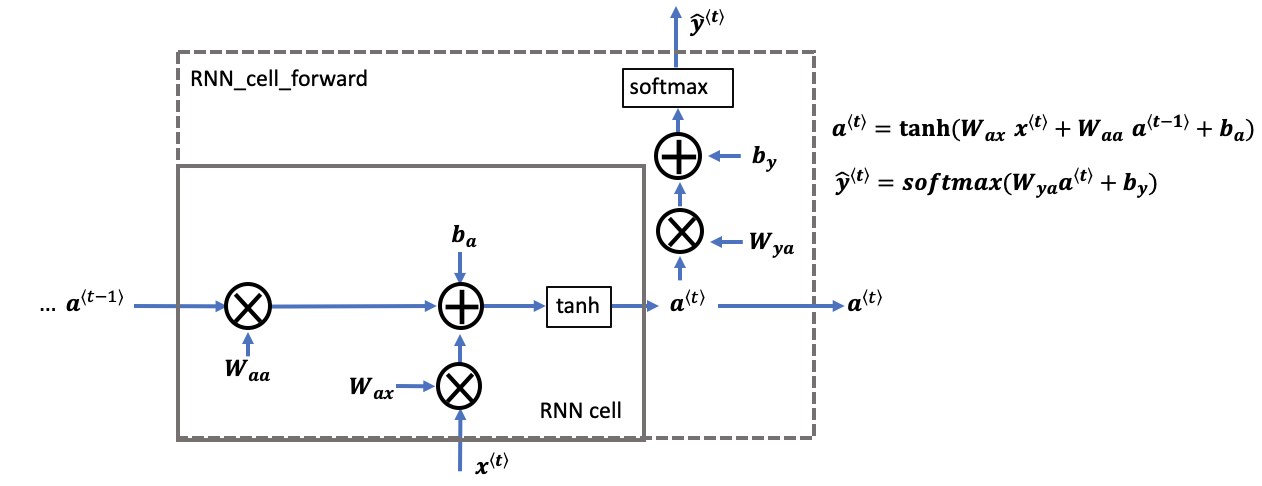

1. Hidden state $$a^{\langle t \rangle} = \tanh(W_{aa} a^{\langle t-1 \rangle} + W_{ax} x^{\langle t \rangle} + b_a)$$
2. Prediction $$\hat{y}^{\langle t \rangle} = softmax(W_{ya} a^{\langle t \rangle} + b_y)$$
3. Store $(a^{\langle t \rangle}, a^{\langle t-1 \rangle}, x^{\langle t \rangle}, parameters)$ in a `cache`.
4. Return $a^{\langle t \rangle}$ , $\hat{y}^{\langle t \rangle}$ and `cache`

In [ ]:
def rnn_cell_forward(xt, a_prev, parameters):
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    a_next = np.tanh(Wax @ xt + Waa @ a_prev + ba)
    yt_pred = softmax(Wya @ a_next + by)
    cache = (a_next, a_prev, xt, parameters)
    return a_next, yt_pred, cache

###Forward pass

- Each cell takes 2 inputs at each time step:
    - $a^{\langle t-1 \rangle}$: hidden state from previous cell
    - $x^{\langle t \rangle}$: current time-step's input data.
- 2 outputs at each time step:
    - A hidden state ($a^{\langle t \rangle}$)
    - A prediction ($y^{\langle t \rangle}$)
- Weights & biases $(W_{aa}, b_{a}, W_{ax}, b_{x})$ are re-used each time step
    - Maintained between calls to `rnn_cell_forward` in 'parameters' dictionary

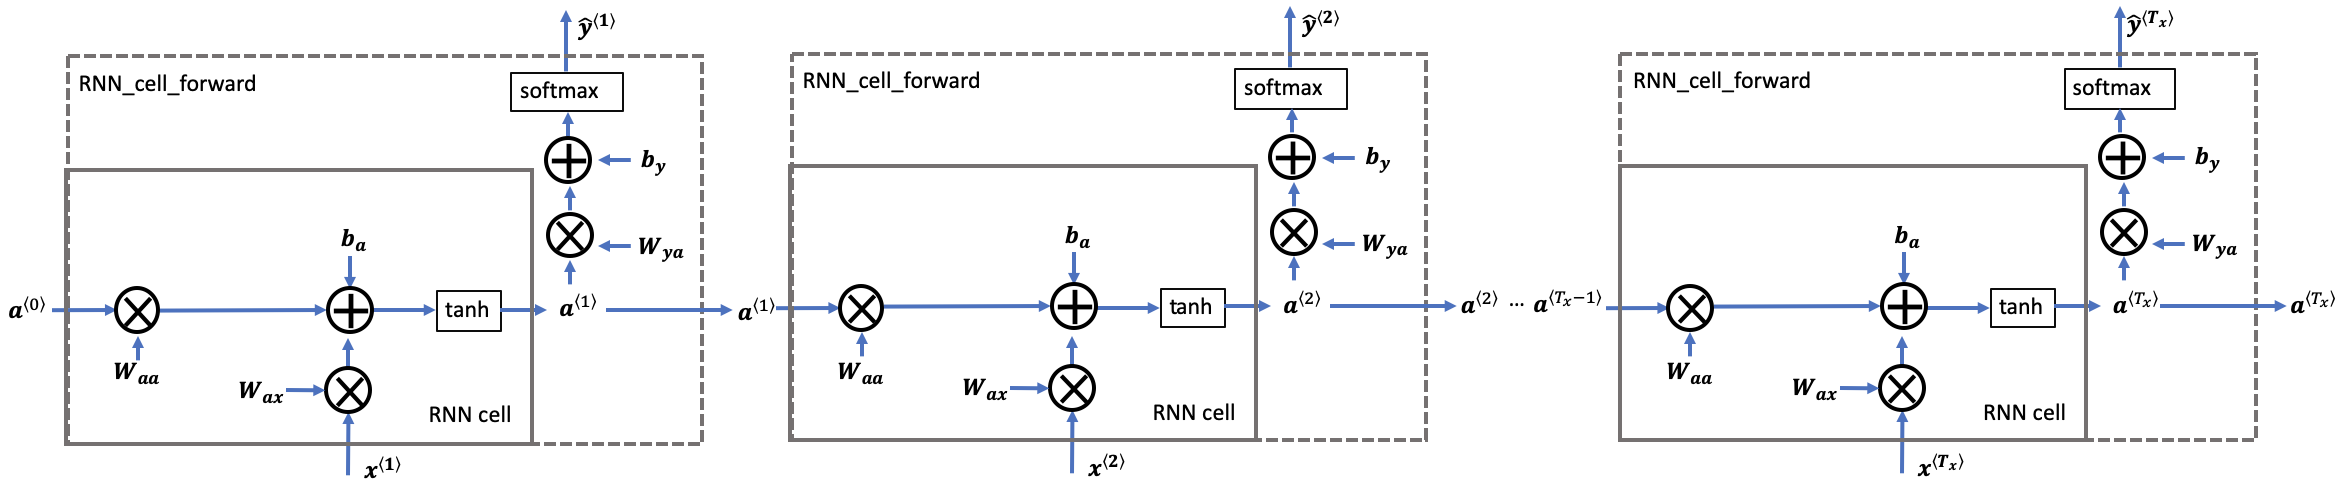

* 3D of zeros, $a$ shape $(n_{a}, m, T_{x})$ store all hidden states
* 3D of zeros, $\hat{y}$ shape $(n_{y}, m, T_{x})$ store predictions
    - This case $T_{y} = T_{x}$
* Initialize 2D hidden state `a_next` by setting it equal to initial hidden state $a_{0}$.
* At each time step $t$:
    - Get $x^{\langle t \rangle}$ - 2D slice of $x$ for a single time step $t$.
        - $x^{\langle t \rangle}$ shape $(n_{x}, m)$
        - $x$ shape $(n_{x}, m, T_{x})$
    - Update 2D hidden state $a^{\langle t \rangle}$ (`a_next`), prediction $\hat{y}^{\langle t \rangle}$, cache by `rnn_cell_forward`
        - $a^{\langle t \rangle}$ has shape $(n_{a}, m)$
    - Store 2D hidden state in 3D tensor $a$, at $t^{th}$ position
    - Store 2D $\hat{y}^{\langle t \rangle}$ prediction (`yt_pred`) in 3D tensor $\hat{y}_{pred}$ at $t^{th}$ position
        - $\hat{y}^{\langle t \rangle}$ shape $(n_{y}, m)$
    - Append cache to list of caches.
* Return $a$, $\hat{y}$, list of caches.

In [ ]:
def rnn_forward(x, a0, parameters):
    caches = []
    n_x, m, T_x = x.shape
    n_y, n_a = parameters['Wya'].shape
    a = np.zeros((n_a, m, T_x))
    y_pred = np.zeros((n_y, m, T_x))
    a_next = a0
    for t in range(T_x):
        a_next, yt_pred, cache = rnn_cell_forward(x[:,:,t], a_next, parameters)
        a[:,:,t] = a_next
        y_pred[:,:,t] = yt_pred
        caches.append(cache)
    caches = (caches, x)
    return a, y_pred, caches

##LSTM

### Gates and states

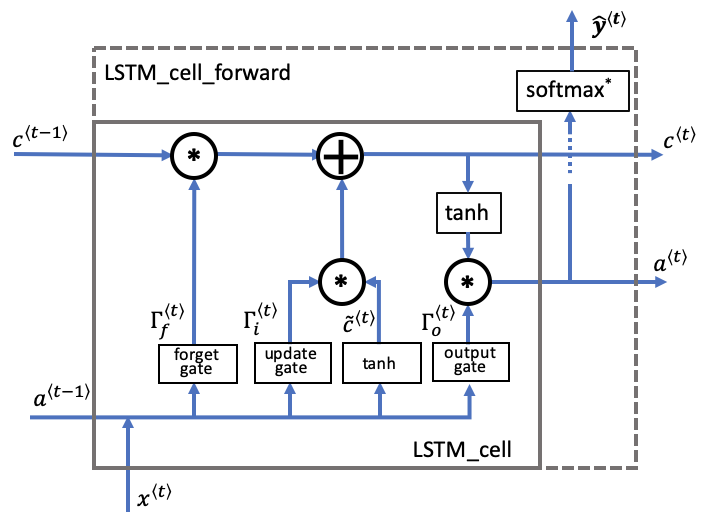

Forget gate $\mathbf{\Gamma}_{f}$
$$\mathbf{\Gamma}_f^{\langle t \rangle} = \sigma(\mathbf{W}_f[\mathbf{a}^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_f)\tag{1} $$
* If close to
    * 0 - "forget" stored state in corresponding unit of previous cell state.
    * 1 - mostly remember corresponding value in stored state.
* Same dimensions as previous cell state $c^{\langle t-1 \rangle}$
* Multiplying tensors $\mathbf{\Gamma}_f^{\langle t \rangle} * \mathbf{c}^{\langle t-1 \rangle}$ (element-wise) is like applying a mask over the previous cell state.
* Variables
    * `Wf`: forget gate weight $\mathbf{W}_{f}$
    * `Wb`: forget gate bias $\mathbf{W}_{b}$
    * `ft`: forget gate $\Gamma_f^{\langle t \rangle}$

Candidate value $\tilde{\mathbf{c}}^{\langle t \rangle}$
$$\mathbf{\tilde{c}}^{\langle t \rangle} = \tanh\left( \mathbf{W}_{c} [\mathbf{a}^{\langle t - 1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_{c} \right) \tag{3}$$
* Tensor containing information (-1 to 1) from current time step that **may** be stored in current cell state $\mathbf{c}^{\langle t \rangle}$.
* `cct`: candidate value $\mathbf{\tilde{c}}^{\langle t \rangle}$

Update gate $\mathbf{\Gamma}_{i}$
$$\mathbf{\Gamma}_i^{\langle t \rangle} = \sigma(\mathbf{W}_i[a^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_i)\tag{2} $$ 
* Decide what aspects of candidate $\tilde{\mathbf{c}}^{\langle t \rangle}$ to add to cell state $c^{\langle t \rangle}$. If close to
    * 1 - allow candidate $\tilde{\mathbf{c}}^{\langle t \rangle}$ to be passed onto hidden state $\mathbf{c}^{\langle t \rangle}$
    * 0 - prevent candidate from being passed onto hidden state
* Multiplied element-wise with the candidate, product ($\mathbf{\Gamma}_{i}^{\langle t \rangle} * \tilde{c}^{\langle t \rangle}$) is used in determining cell state $\mathbf{c}^{\langle t \rangle}$.
* Variables
    * `Wi` update gate weight $\mathbf{W}_i$
    * `bi` update gate bias $\mathbf{b}_i$
    * `it` forget gate $\mathbf{\Gamma}_i^{\langle t \rangle}$

Cell state $\mathbf{c}^{\langle t \rangle}$
$$ \mathbf{c}^{\langle t \rangle} = \mathbf{\Gamma}_f^{\langle t \rangle}* \mathbf{c}^{\langle t-1 \rangle} + \mathbf{\Gamma}_{i}^{\langle t \rangle} *\mathbf{\tilde{c}}^{\langle t \rangle} \tag{4} $$
* "Memory" passed onto future time steps. Combination of the previous cell state and the candidate value
* Variables
    * `c`: cell state, including all time steps, $\mathbf{c}$ shape $(n_{a}, m, T)$
    * `c_next`: new (next) cell state, $\mathbf{c}^{\langle t \rangle}$ shape $(n_{a}, m)$
    * `c_prev`: previous cell state, $\mathbf{c}^{\langle t-1 \rangle}$, shape $(n_{a}, m)$

Output gate $\mathbf{\Gamma}_{o}$
$$ \mathbf{\Gamma}_o^{\langle t \rangle}=  \sigma(\mathbf{W}_o[\mathbf{a}^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_{o})\tag{5}$$ 
* Decide what gets sent as prediction (output) of time step.
* Variables
    * `Wo`: output gate weight, $\mathbf{W_o}$
    * `bo`: output gate bias, $\mathbf{b_o}$
    * `ot`: output gate, $\mathbf{\Gamma}_{o}^{\langle t \rangle}$

Hidden state $\mathbf{a}^{\langle t \rangle}$
$$ \mathbf{a}^{\langle t \rangle} = \mathbf{\Gamma}_o^{\langle t \rangle} * \tanh(\mathbf{c}^{\langle t \rangle})\tag{6} $$
* Passed to LSTM cell's next time step.
* Used to determine 3 gates ($\mathbf{\Gamma}_{f}, \mathbf{\Gamma}_{u}, \mathbf{\Gamma}_{o}$) of the next time step.
* Also used for the prediction $y^{\langle t \rangle}$.
* Output gate like a "mask" - either preserves values of $\tanh(\mathbf{c}^{\langle t \rangle})$ or keeps those values from being included in hidden state $\mathbf{a}^{\langle t \rangle}$

* Variables
    * `a`: hidden state, including time steps.  $\mathbf{a}$ shape $(n_{a}, m, T_{x})$
    * `a_prev`: hidden state from previous time step. $\mathbf{a}^{\langle t-1 \rangle}$ shape $(n_{a}, m)$
    * `a_next`: hidden state for next time step.  $\mathbf{a}^{\langle t \rangle}$ shape $(n_{a}, m)$

Prediction $\mathbf{y}^{\langle t \rangle}_{pred}$
$$\mathbf{y}^{\langle t \rangle}_{pred} = \textrm{softmax}(\mathbf{W}_{y} \mathbf{a}^{\langle t \rangle} + \mathbf{b}_{y})$$

* Variables
    * `y_pred`: 
$\mathbf{y}_{pred}$ shape $(n_{y}, m, T_{x})$ - prediction, including all time steps. Note $(T_{y} = T_{x})$ for this example
    * `yt_pred`: 
$\mathbf{y}^{\langle t \rangle}_{pred}$ shape $(n_{y}, m)$ - prediction for current time step $t$.

### LSTM Cell

1. Concatenate hidden state $a^{\langle t-1 \rangle}$ and input $x^{\langle t \rangle}$ into a single matrix:  

$$concat = \begin{bmatrix} a^{\langle t-1 \rangle} \\ x^{\langle t \rangle} \end{bmatrix}$$  

2. Compute all the formulas for the gates, hidden state, and cell state
3. Compute prediction $y^{\langle t \rangle}$

In [ ]:
def lstm_cell_forward(xt, a_prev, c_prev, parameters):
    Wf = parameters["Wf"]
    bf = parameters["bf"]
    Wi = parameters["Wi"]
    bi = parameters["bi"]
    Wc = parameters["Wc"]
    bc = parameters["bc"]
    Wo = parameters["Wo"]
    bo = parameters["bo"]
    Wy = parameters["Wy"]
    by = parameters["by"]

    n_x, m = xt.shape
    n_y, n_a = Wy.shape
    concat = np.concatenate((a_prev, xt), axis = 0)
    ft = sigmoid(Wf @ concat + bf)
    it = sigmoid(Wi @ concat + bi)
    cct = np.tanh(Wc @ concat + bc)
    c_next = ft * c_prev + it * cct
    ot = sigmoid(Wo @ concat + bo)
    a_next = ot * np.tanh(c_next)
    yt_pred = softmax(Wy @ a_next + by)
    cache = (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters)
    return a_next, c_next, yt_pred, cache

###Forward Pass

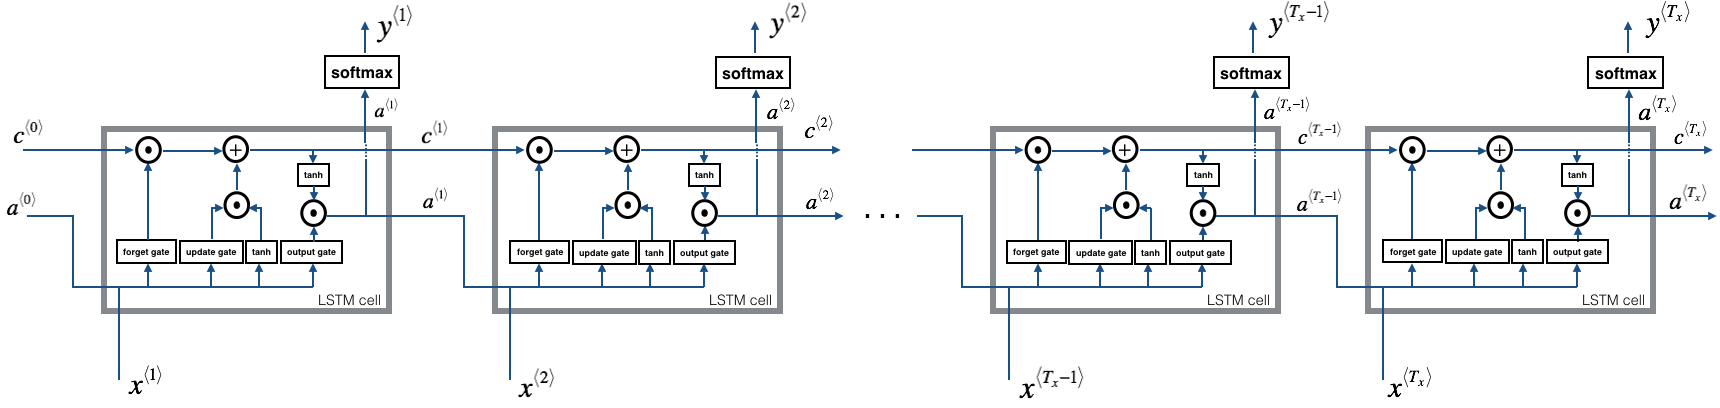

* Get dimensions $n_x, n_a, n_y, m, T_x$ from shape of: `x` and `parameters`
* Initialize 3D tensors $a$, $c$, $y$
    - $a$: hidden state $(n_{a}, m, T_{x})$
    - $c$: cell state $(n_{a}, m, T_{x})$
    - $y$: prediction $(n_{y}, m, T_{x})$ (Note $T_{y} = T_{x}$ this example)
* Initialize 2D tensor $a^{\langle t \rangle}$ shape $(n_{a}, m)$ 
    - $a^{\langle t \rangle}$ stores hidden state for time step $t$ - `a_next`
    - $a^{\langle 0 \rangle}$ initial hidden state at time step 0, is passed in when calling function - `a0`.
    - Initialize $a^{\langle t \rangle}$ by setting it to initial hidden state ($a^{\langle 0 \rangle}$) that is passed into function.
* Initialize $c^{\langle t \rangle}$ with zeros shape $(n_{a}, m)$ - `c_next`
* For each time step:
    - From 3D tensor $x$, get a 2D slice $x^{\langle t \rangle}$ at time step $t$
    - `lstm_cell_forward`
    - Store hidden state, cell state, prediction (2D tensors) inside 3D tensors
    - Append cache to list of caches

In [ ]:
def lstm_forward(x, a0, parameters):
    caches = []
    n_x, m, T_x = x.shape
    n_y, n_a = parameters['Wy'].shape
    a = np.zeros((n_a, m, T_x))
    c = np.zeros((n_a, m, T_x))
    y = np.zeros((n_y, m, T_x))
    a_next = a0
    c_next = np.zeros((n_a, m))
    for t in range(T_x):
        xt = x[:,:,t]
        a_next, c_next, yt, cache = lstm_cell_forward(xt, a_next, c_next, parameters)
        a[:,:,t] = a_next
        c[:,:,t] = c_next
        y[:,:,t] = yt
        caches.append(cache)
    caches = (caches, x)
    return a, y, c, caches